In [1]:
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

ROOT_DIR = "./data"
RANDOM_SEED = 110

np.random.seed(RANDOM_SEED)
%matplotlib inline
sns.set_style(rc={"axes.unicode_minus":False},
        style='darkgrid')

In [2]:
# read csv
df = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
df.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


### NaN

In [3]:
nan_columns = df.columns[df.isnull().any()]
# 대부분 전부 NaN이거나 최소 약 만 천 개 이상 NaN이라서 전부 삭제
df.drop(nan_columns, axis=1, inplace=True) # 464 entries -> 178 entries

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 178 entries, Wip Line_Dam to target
dtypes: float64(72), int64(77), object(29)
memory usage: 55.0+ MB


In [5]:
df.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal


### Duplicates

In [6]:
CAT = ["Dam", "AutoClave", "Fill1", "Fill2"]

In [7]:
wip_line = [f"Wip Line_{cat}" for cat in CAT]
sum(df.duplicated(subset=wip_line)) # 전부 동일한 행

40505

In [8]:
for cat in CAT:
    print(df[f"Wip Line_{cat}"].unique())

['IVI-OB6']
['IVI-OB6']
['IVI-OB6']
['IVI-OB6']


In [9]:
# 전부 IVI-OB6이므로 삭제
df.drop(wip_line, axis=1, inplace=True) # 178 entries -> 174 entries

In [10]:
for cat in CAT:
    print(cat, df[f"Process Desc._{cat}"].unique())

Dam ['Dam Dispenser']
AutoClave ['Auto Clave Out']
Fill1 ['Fill1 Dispenser']
Fill2 ['Fill2 Dispenser']


In [11]:
for cat in CAT:
    print(cat, df[f"Equipment_{cat}"].unique())

Dam ['Dam dispenser #1' 'Dam dispenser #2']
AutoClave ['Auto Clave Out']
Fill1 ['Fill1 dispenser #1' 'Fill1 dispenser #2']
Fill2 ['Fill2 dispenser #1' 'Fill2 dispenser #2']


In [12]:
process_desc = [f"Process Desc._{cat}" for cat in CAT]
# Equipment가 Process Desc. 역할하고 있으므로 전부 삭제
df.drop(process_desc, axis=1, inplace=True) # 174 entries -> 170 entries

In [13]:
for cat in CAT:
    col = f"Equipment_{cat}"
    if cat == "AutoClave": # AutoClave는 Auto Clave Out으로 전부 같으므로 삭제
        df.drop(col, axis=1, inplace=True) # 170 entries -> 169 entries
    else:
        df[col] = df[col].str.split("#", expand=True)[1] # e.g.Dam dispenser #1 -> 1 / Dam dispenser #2 -> 2

In [14]:
for cat in CAT:
    print(df[f"Model.Suffix_{cat}"].unique())

['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']


In [15]:
model_suffix = [f"Model.Suffix_{cat}" for cat in CAT]
df[~df.duplicated(subset=model_suffix)][model_suffix]

,Model.Suffix_Dam,Model.Suffix_AutoClave,Model.Suffix_Fill1,Model.Suffix_Fill2
0,AJX75334505,AJX75334505,AJX75334505,AJX75334505
2,AJX75334501,AJX75334501,AJX75334501,AJX75334501
17,AJX75334502,AJX75334502,AJX75334502,AJX75334502
24,AJX75334507,AJX75334507,AJX75334507,AJX75334507
141,AJX75334506,AJX75334506,AJX75334506,AJX75334506
301,AJX75334508,AJX75334508,AJX75334508,AJX75334508
605,AJX75334503,AJX75334503,AJX75334503,AJX75334503


In [16]:
df["Model.Suffix"] = df["Model.Suffix_Dam"]
model_suffix = [f"Model.Suffix_{cat}" for cat in CAT]
# 전부 같으므로 통합한 Model.Suffix 열 만들고 다 삭제
df.drop(model_suffix, axis=1, inplace=True) # 169 entries -> 166 entries

In [17]:
df["Model.Suffix"].str[:4].unique()
# 모두 AJX7므로 대카테고리 안만들기로 함

array(['AJX7'], dtype=object)

In [18]:
for cat in CAT:
    print(df[f"Insp. Seq No._{cat}"].unique())

[1]
[1]
[1]
[1]


In [19]:
insp_seq_no = [f"Insp. Seq No._{cat}" for cat in CAT]
# 모두 값이 1로 같으므로 전부 삭제
df.drop(insp_seq_no, axis=1, inplace=True) # 166 entries -> 162 entries

In [20]:
for cat in CAT:
    print(df[f"Insp Judge Code_{cat}"].unique())

['OK']
['OK']
['OK']
['OK']


In [21]:
insp_jude_code = [f"Insp Judge Code_{cat}" for cat in CAT]
# 모두 값이 OK로 같으므로 전부 삭제
df.drop(insp_jude_code, axis=1, inplace=True) # 162 entries -> 158 entries

In [22]:
# Workorder 전부 같으므로 통합한 Workorder 카테고리 만들고 전부 삭제
df["Workorder"] = df["Workorder_Dam"]
work_order = [f"Workorder_{cat}" for cat in CAT]
df.drop(work_order, axis=1, inplace=True) # 158 entries -> 155 entries

In [23]:
df["Workorder"].str.split('-', expand=True)[0].str[:4].unique()

array(['4F1X', '3KPM', '4E1X', '3K1X', '3HPM', '3G1X', '3M1X', '4A1X',
       '3H1X', '3L1X', '3GPM', '3F1X', '4B1X', '4C1X', '3MPX', '3I1X',
       '3J1X', '3JPX', '4CPM', '3LPM', '4BPX', '4BPM', '3HPX', '4CPX',
       '4EPM', '3FPM', '4APX', '3KPX', '3FPX'], dtype=object)

In [24]:
df["Workorder Category"] = df["Workorder"].str.split('-', expand=True)[0].str[:4] # 156 entries

In [25]:
df.rename(columns={"1st Pressure 1st Pressure Unit Time_AutoClave": "1st Pressure Unit Time_AutoClave"}, inplace=True)

In [26]:
# df.to_csv(os.path.join(ROOT_DIR, "pre_1.csv"), index=False)

### AutoClave

In [27]:
grouped_columns = utils.get_columns_group(df)

In [28]:
df_auto = df[grouped_columns["AutoClave"]]
df_auto.head()

,1st Pressure Collect Result_AutoClave,1st Pressure Unit Time_AutoClave,1st Pressure Judge Value_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,2nd Pressure Judge Value_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,3rd Pressure Judge Value_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave
0,0.312,240,OK,0.493,1,OK,0.499,120,OK,54,361,OK
1,0.311,241,OK,0.311,121,OK,0.498,121,OK,54,483,OK
2,0.315,241,OK,0.490,1,OK,0.498,121,OK,56,363,OK
3,0.299,241,OK,0.300,121,OK,0.500,121,OK,54,483,OK
4,0.302,240,OK,0.302,120,OK,0.498,120,OK,47,480,NG


In [29]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   1st Pressure Collect Result_AutoClave   40506 non-null  float64
 1   1st Pressure Unit Time_AutoClave        40506 non-null  int64  
 2   1st Pressure Judge Value_AutoClave      40506 non-null  object 
 3   2nd Pressure Collect Result_AutoClave   40506 non-null  float64
 4   2nd Pressure Unit Time_AutoClave        40506 non-null  int64  
 5   2nd Pressure Judge Value_AutoClave      40506 non-null  object 
 6   3rd Pressure Collect Result_AutoClave   40506 non-null  float64
 7   3rd Pressure Unit Time_AutoClave        40506 non-null  int64  
 8   3rd Pressure Judge Value_AutoClave      40506 non-null  object 
 9   Chamber Temp. Collect Result_AutoClave  40506 non-null  int64  
 10  Chamber Temp. Unit Time_AutoClave       40506 non-null  in

In [30]:
df_auto.describe()

,1st Pressure Collect Result_AutoClave,1st Pressure Unit Time_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave
count,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000
mean,0.307124,244.949119,0.396764,56.932035,0.501117,122.104059,51.691725,423.985212
std,0.005369,21.475360,0.096129,56.123765,0.025190,8.775836,2.878083,61.066771
min,0.290000,0.000000,0.297000,0.000000,0.305000,1.000000,32.000000,3.000000
25%,0.302000,241.000000,0.309000,1.000000,0.498000,120.000000,49.000000,363.000000
50%,0.308000,241.000000,0.316000,60.000000,0.499000,121.000000,52.000000,452.000000
75%,0.312000,241.000000,0.491000,121.000000,0.500000,121.000000,54.000000,483.000000
max,0.319000,300.000000,0.900000,181.000000,0.914000,301.000000,59.000000,540.000000


In [31]:
df["1st Pressure Judge Value_AutoClave"].unique()

array(['OK'], dtype=object)

In [32]:
df["2nd Pressure Judge Value_AutoClave"].unique()

array(['OK'], dtype=object)

In [33]:
df["3rd Pressure Judge Value_AutoClave"].unique()

array(['OK'], dtype=object)

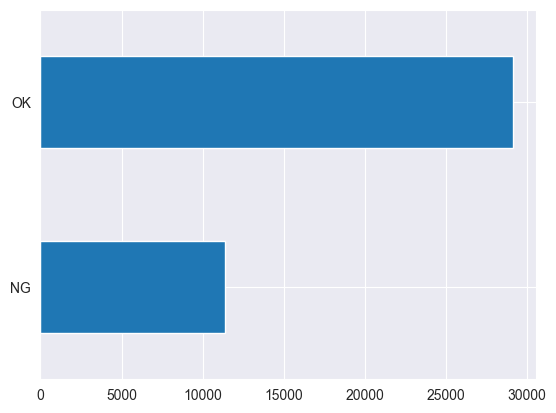

In [34]:
df["Chamber Temp. Judge Value_AutoClave"].value_counts().sort_values().plot(kind="barh");

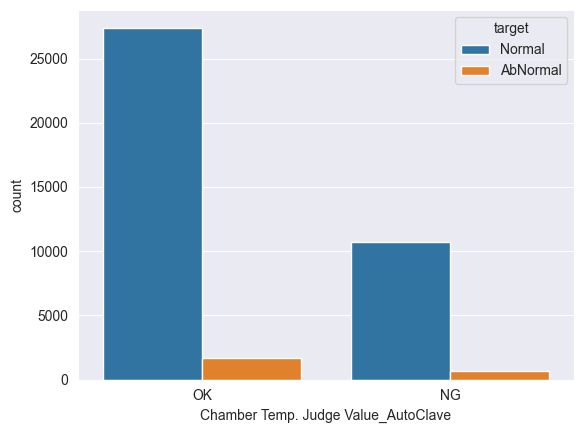

In [35]:
sns.countplot(x="Chamber Temp. Judge Value_AutoClave", hue="target", data=df);

In [36]:
# 모두 Ok 값이므로 삭제
df.drop(["1st Pressure Judge Value_AutoClave",
         "2nd Pressure Judge Value_AutoClave",
         "3rd Pressure Judge Value_AutoClave"], axis=1, inplace=True) # 153 entries

In [37]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit_transform(df["Chamber Temp. Judge Value_AutoClave"])

# # Ok (1) NG (0)
# df["Chamber Temp. Judge Value_AutoClave"] = le.fit_transform(df["Chamber Temp. Judge Value_AutoClave"])

In [38]:
pressure_unit_time = df[["1st Pressure Unit Time_AutoClave", 
                         "2nd Pressure Unit Time_AutoClave",
                         "3rd Pressure Unit Time_AutoClave",]]

df["Mean Pressure Unit Time_AutoClave"] = pressure_unit_time.apply("mean", axis=1).astype('int64')

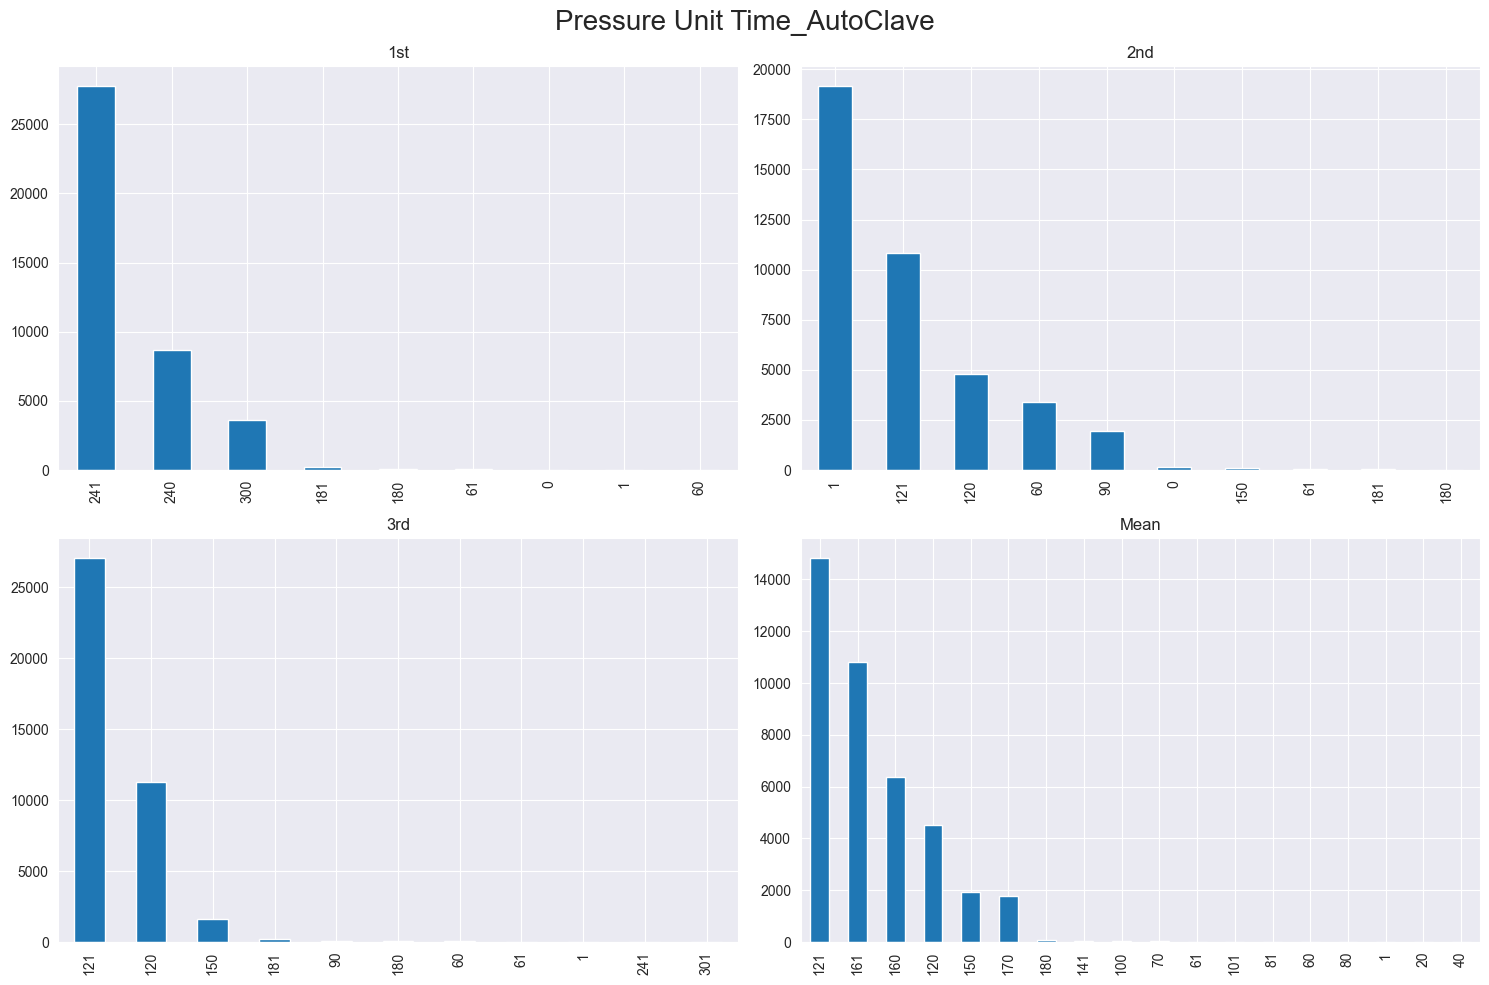

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df["1st Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[0, 0], title="1st");
df["2nd Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[0, 1], title="2nd");
df["3rd Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[1, 0], title="3rd");
df["Mean Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[1, 1], title="Mean");
fig.suptitle("Pressure Unit Time_AutoClave", size=20)
plt.tight_layout();

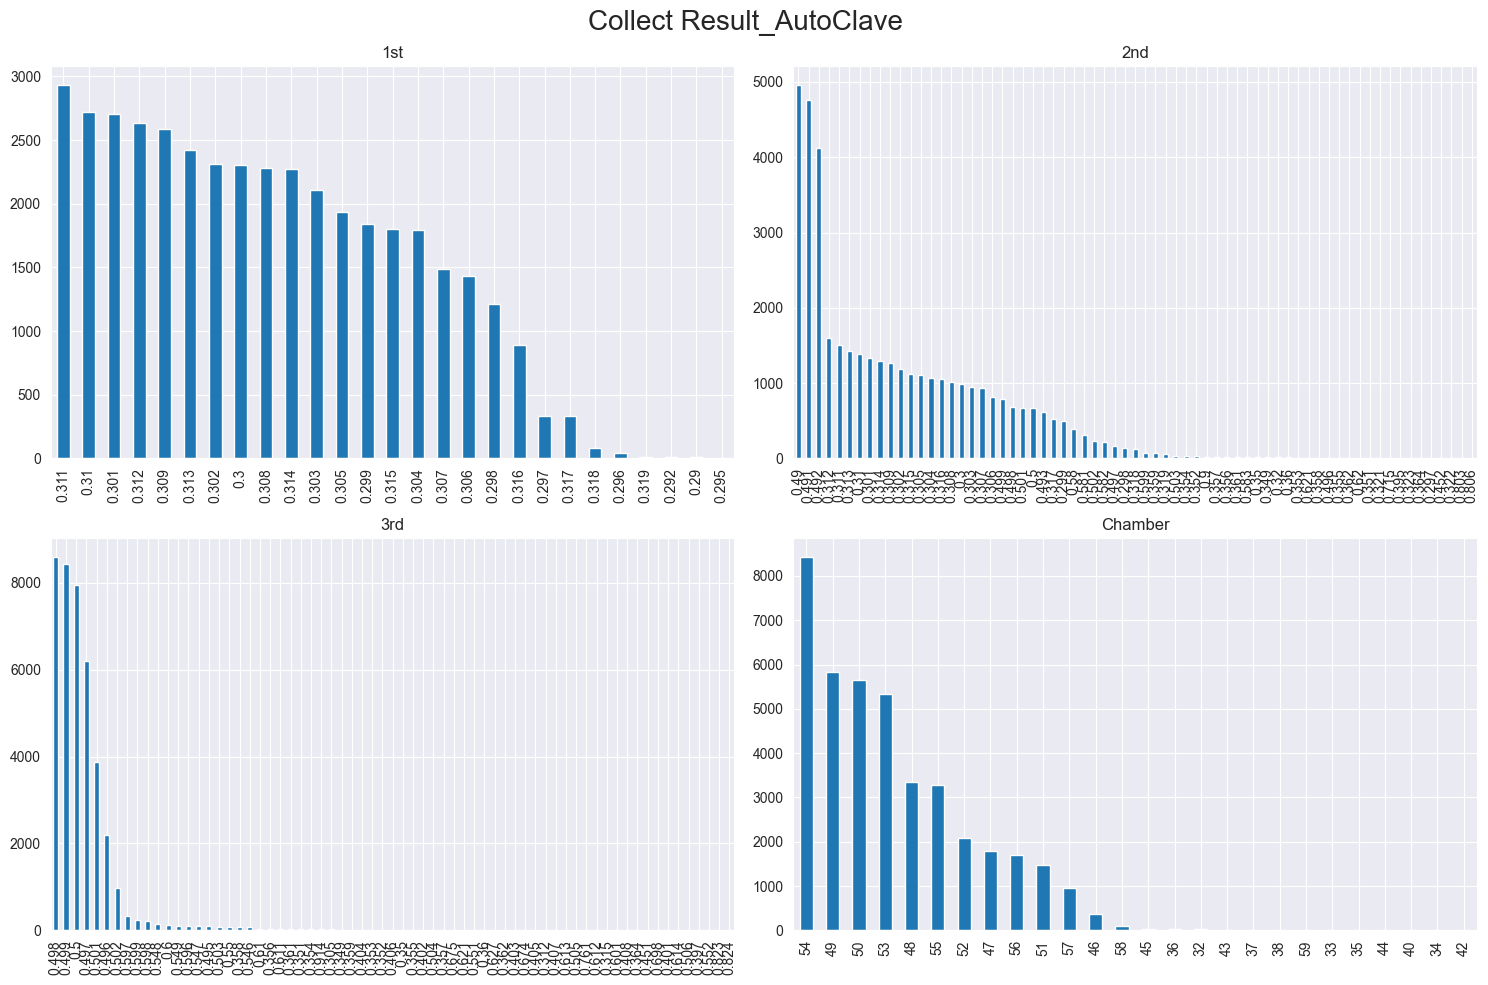

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df["1st Pressure Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[0, 0], title="1st");
df["2nd Pressure Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[0, 1], title="2nd");
df["3rd Pressure Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[1, 0], title="3rd");
df["Chamber Temp. Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[1, 1], title="Chamber");
fig.suptitle("Collect Result_AutoClave", size=20)
plt.tight_layout();

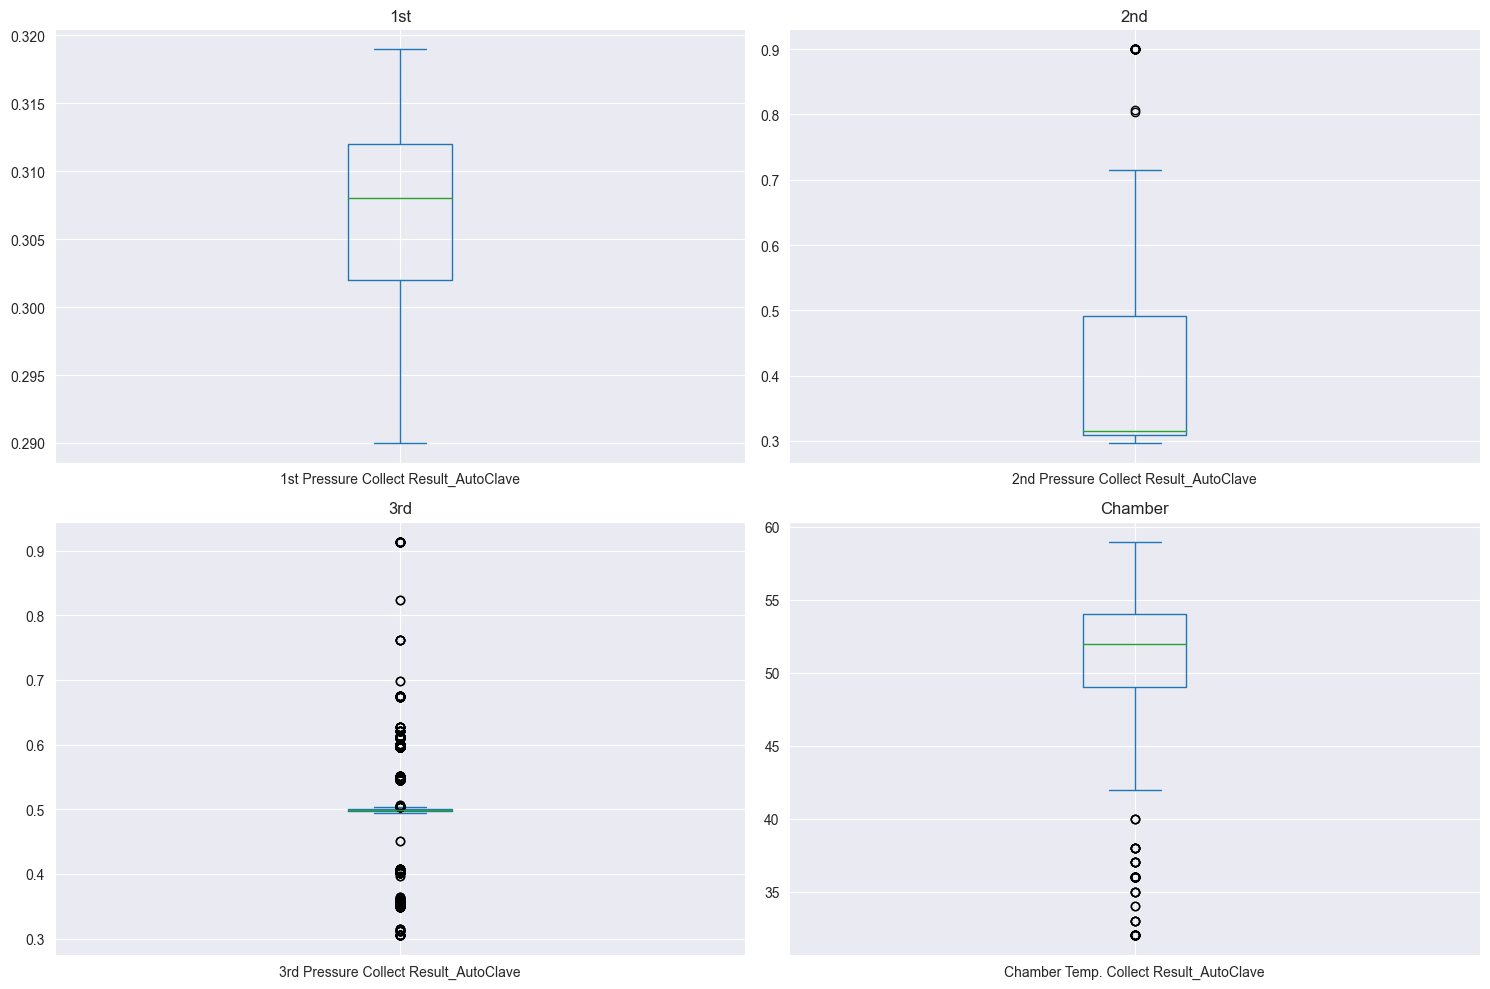

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df["1st Pressure Collect Result_AutoClave"].plot.box(ax=axes[0, 0], title="1st");
df["2nd Pressure Collect Result_AutoClave"].plot.box(ax=axes[0, 1], title="2nd");
df["3rd Pressure Collect Result_AutoClave"].plot.box(ax=axes[1, 0], title="3rd");
df["Chamber Temp. Collect Result_AutoClave"].plot.box(ax=axes[1, 1], title="Chamber");
plt.tight_layout();

In [42]:
Q1 = df['3rd Pressure Collect Result_AutoClave'].quantile(0.25)
Q3 = df['3rd Pressure Collect Result_AutoClave'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}") # 2098개

Q1: 0.498
Q3: 0.5


In [43]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['3rd Pressure Collect Result_AutoClave'] >= lower_bound) & (df['3rd Pressure Collect Result_AutoClave'] <= upper_bound)]

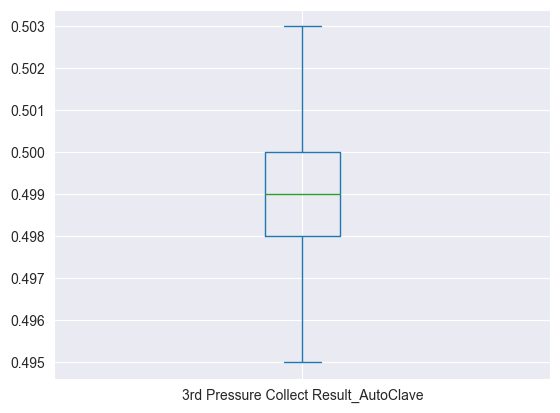

In [44]:
df["3rd Pressure Collect Result_AutoClave"].plot.box();

In [45]:
pressure_collect_result = df[["1st Pressure Collect Result_AutoClave", 
                              "2nd Pressure Collect Result_AutoClave",
                              "3rd Pressure Collect Result_AutoClave",]]

df["Mean Pressure Collect Result_AutoClave"] = pressure_collect_result.apply("mean", axis=1).round(3)

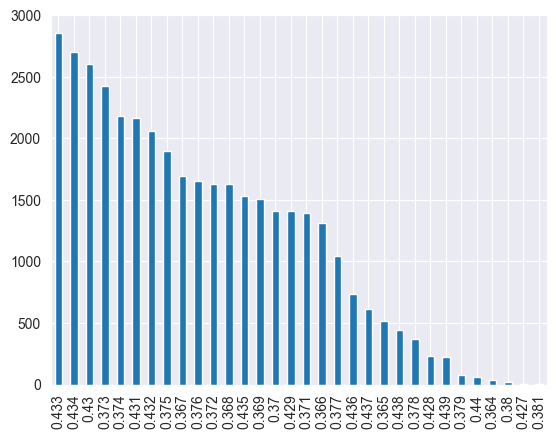

In [46]:
df["Mean Pressure Collect Result_AutoClave"].value_counts().plot.bar();

In [47]:
# # save csv
# df.to_csv(os.path.join(ROOT_DIR, "pre_1.csv"), index=False)

## Dam

In [48]:
grouped_columns = utils.get_columns_group(df)
df_dam = df[grouped_columns["Dam"]]
df_dam.head(3).T

,0,1,2
Equipment_Dam,1,1,2
CURE END POSITION X Collect Result_Dam,240.0,240.0,1000.0
CURE END POSITION Z Collect Result_Dam,2.5,2.5,12.5
CURE END POSITION Θ Collect Result_Dam,-90,-90,90
CURE SPEED Collect Result_Dam,100,70,85
...,...,...,...
Stage3 Line4 Distance Speed Collect Result_Dam,5800,4000,5800
THICKNESS 1 Collect Result_Dam,5800,0,5800
THICKNESS 2 Collect Result_Dam,0.0,0.0,0.012
THICKNESS 3 Collect Result_Dam,0.0,0.0,-0.022


In [49]:
df_dam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38408 entries, 0 to 40505
Data columns (total 70 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Equipment_Dam                                             38408 non-null  object 
 1   CURE END POSITION X Collect Result_Dam                    38408 non-null  float64
 2   CURE END POSITION Z Collect Result_Dam                    38408 non-null  float64
 3   CURE END POSITION Θ Collect Result_Dam                    38408 non-null  int64  
 4   CURE SPEED Collect Result_Dam                             38408 non-null  int64  
 5   CURE STANDBY POSITION X Collect Result_Dam                38408 non-null  int64  
 6   CURE STANDBY POSITION Z Collect Result_Dam                38408 non-null  float64
 7   CURE STANDBY POSITION Θ Collect Result_Dam                38408 non-null  int64  
 8   CURE START POSIT

In [50]:
df_dam.describe()

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam
count,38408.000000,38408.000000,38408.000000,38408.000000,38408.0,38408.0,38408.0,38408.000000,38408.0,38408.000000,...,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000,38408.000000
mean,529.590710,6.310404,-21.412727,73.993569,1150.0,33.5,0.0,744.219694,33.5,-21.412727,...,6434.219433,6434.219433,6428.855968,6432.201625,6428.855968,6431.029994,3368.582066,-0.000941,-0.004812,2.931988
std,369.093087,4.856488,87.416784,9.947818,0.0,0.0,0.0,364.236600,0.0,87.416784,...,1710.773675,1710.773675,1705.849155,1710.989759,1705.849155,1711.114122,2956.596737,0.007038,0.020640,3.459015
min,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,-90.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0.000000,-0.054000,-0.219000,-0.118000
25%,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,280.000000,33.5,-90.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,0.000000,0.000000,0.000000,0.000000
50%,240.000000,2.500000,-90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,-90.000000,...,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,4000.000000,0.000000,0.000000,0.000000
75%,1000.000000,12.500000,90.000000,70.000000,1150.0,33.5,0.0,1030.000000,33.5,90.000000,...,9000.000000,9000.000000,7000.000000,9000.000000,7000.000000,9000.000000,6500.000000,0.000000,0.000000,7.000000
max,1000.000000,12.500000,90.000000,105.000000,1150.0,33.5,0.0,1030.000000,33.5,90.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,6500.000000,0.037000,0.007000,7.000000


#### CURE

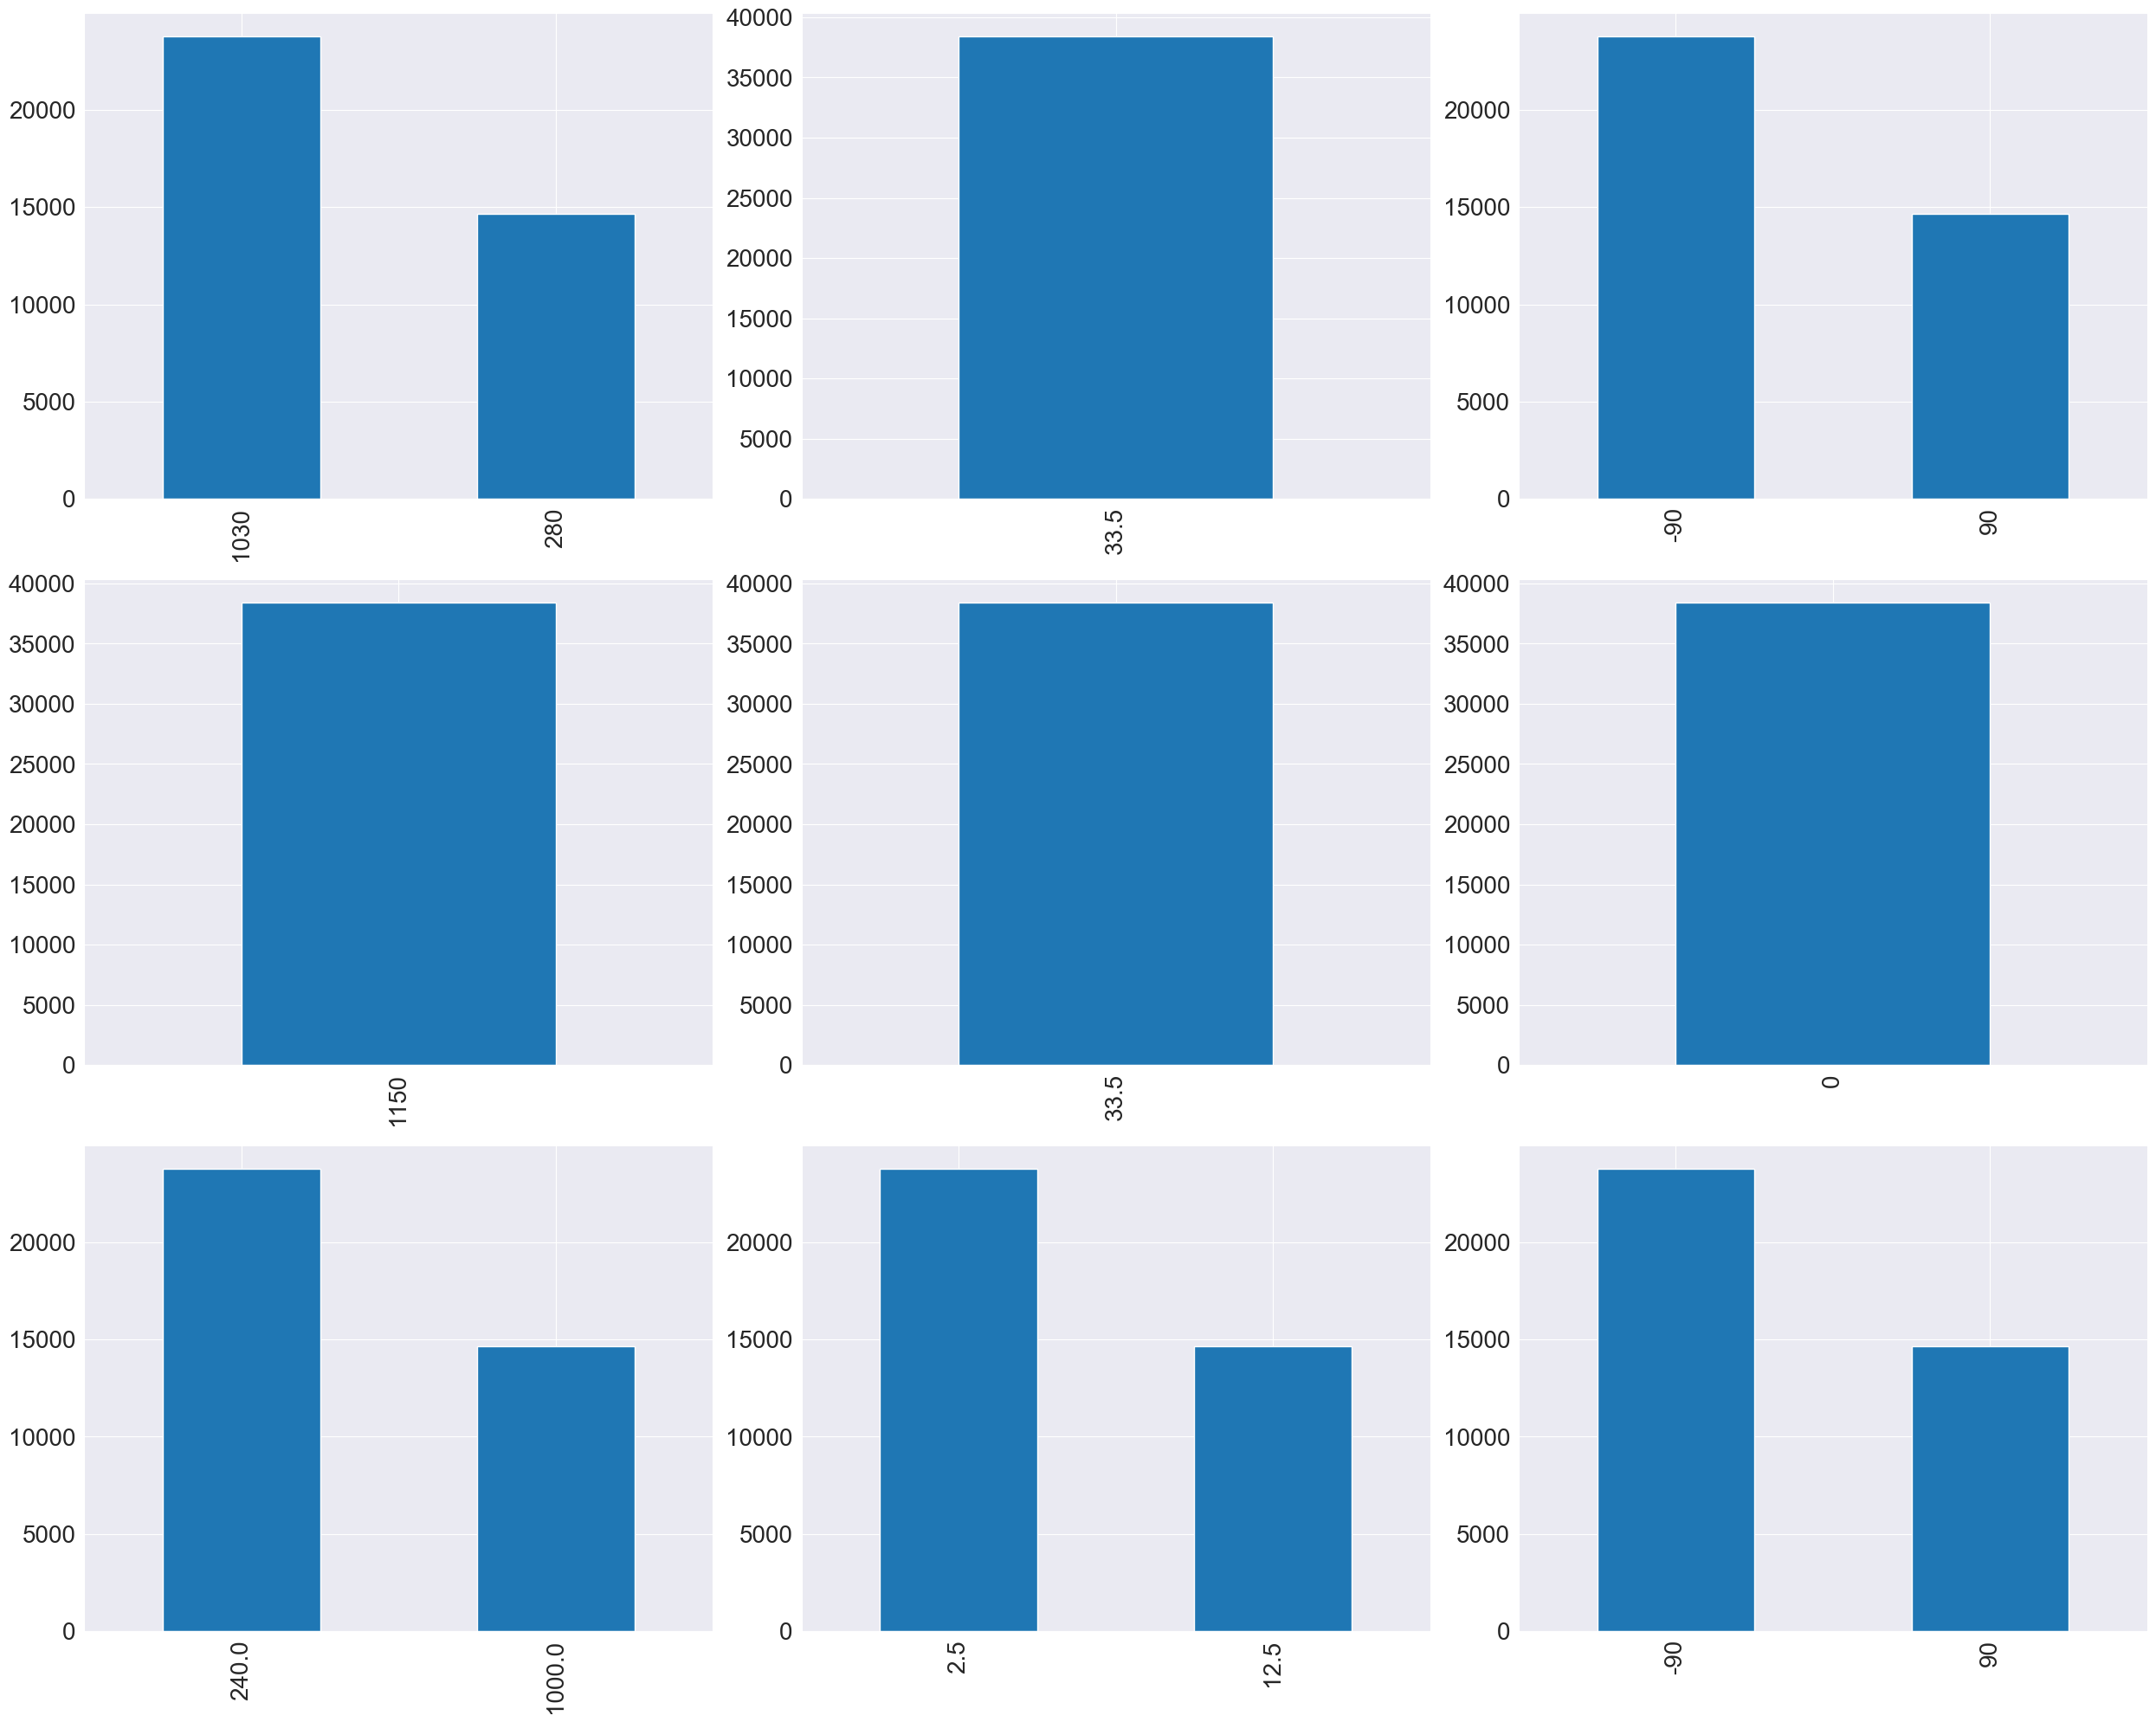

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

df["CURE START POSITION X Collect Result_Dam"].value_counts().plot.bar(ax=axes[0, 0]);
df["CURE START POSITION Z Collect Result_Dam"].value_counts().plot.bar(ax=axes[0, 1]);
df["CURE START POSITION Θ Collect Result_Dam"].value_counts().plot.bar(ax=axes[0, 2]);

df["CURE STANDBY POSITION X Collect Result_Dam"].value_counts().plot.bar(ax=axes[1, 0]);
df["CURE STANDBY POSITION Z Collect Result_Dam"].value_counts().plot.bar(ax=axes[1, 1]);
df["CURE STANDBY POSITION Θ Collect Result_Dam"].value_counts().plot.bar(ax=axes[1, 2]);

df["CURE END POSITION X Collect Result_Dam"].value_counts().plot.bar(ax=axes[2, 0]);
df["CURE END POSITION Z Collect Result_Dam"].value_counts().plot.bar(ax=axes[2, 1]);
df["CURE END POSITION Θ Collect Result_Dam"].value_counts().plot.bar(ax=axes[2, 2]);

for ax in axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=20)
 
plt.tight_layout();

In [52]:
df["CURE START POSITION Θ Collect Result_Dam"].equals(df["CURE END POSITION Θ Collect Result_Dam"])

True

In [53]:
df["CURE START POSITION Z Collect Result_Dam"].equals(df["CURE STANDBY POSITION Z Collect Result_Dam"])

True

In [54]:
# 중복값 행이므로 START POSITION만 남기고 삭제
df.drop(["CURE END POSITION Θ Collect Result_Dam", "CURE STANDBY POSITION Z Collect Result_Dam"], axis=1, inplace=True)

In [55]:
# 단일값이라 삭제
df.drop(["CURE START POSITION Z Collect Result_Dam",
         "CURE STANDBY POSITION X Collect Result_Dam",
         "CURE STANDBY POSITION Θ Collect Result_Dam"], axis=1, inplace=True)
# 150 entries

In [56]:
cure_position_dam_df = df.loc[:, df.columns.str.contains(r"^CURE.*POSITION.*_Dam$")]
cure_position_dam_unique_rows = cure_position_dam_df.drop_duplicates()
cure_position_dam_unique_rows

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam
0,240.0,2.5,1030,-90
2,1000.0,12.5,280,90


In [57]:
cure_dam_df = df.loc[:, df.columns.str.contains(r"^CURE.*_Dam$")]
cure_dam_unique_rows = cure_dam_df.drop_duplicates()
cure_dam_unique_rows
# 같은 POSTION이더라도 SPEED가 달라지는 것을 확인할 수 있음

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam
0,240.0,2.5,100,1030,-90
1,240.0,2.5,70,1030,-90
2,1000.0,12.5,85,280,90
3,1000.0,12.5,70,280,90
24,240.0,2.5,85,1030,-90
68,1000.0,12.5,100,280,90
69,240.0,2.5,95,1030,-90
70,240.0,2.5,105,1030,-90
167,1000.0,12.5,105,280,90
528,1000.0,12.5,95,280,90


#### DISCHARGED

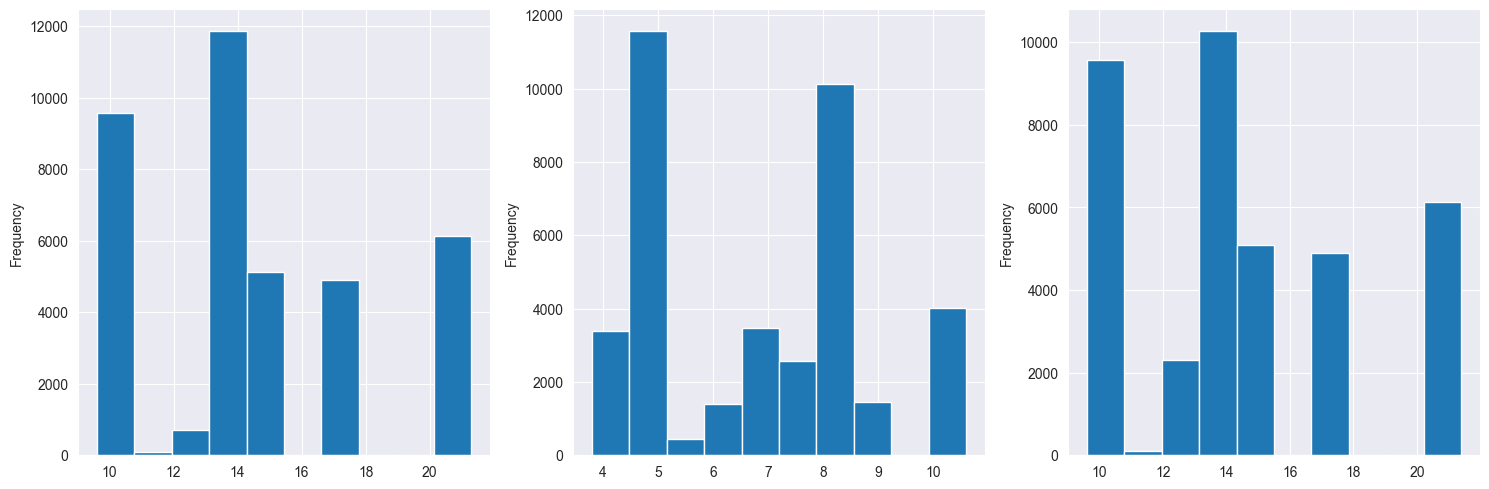

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].plot.hist(ax=axes[0]);
df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam"].plot.hist(ax=axes[1]);
df["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"].plot.hist(ax=axes[2]);

plt.tight_layout();

In [59]:
df["DISCHARGED SPEED OF RESIN Collect Result_Dam"].value_counts()

10    20715
16    17689
15        4
Name: DISCHARGED SPEED OF RESIN Collect Result_Dam, dtype: int64

In [60]:
df[df["DISCHARGED SPEED OF RESIN Collect Result_Dam"] == 15]["target"]

2398     AbNormal
13852      Normal
15148      Normal
40332      Normal
Name: target, dtype: object

In [61]:
discharged_time_df = df.loc[:, df.columns.str.contains(r"^DISCHARGED.*TIME.*_Dam$")]
discharged_time_df.corr()
# DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
# DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
# 상관관계가 거의 1에 가까움

,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,1.000000,0.621209,0.999478
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,0.621209,1.000000,0.616144
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,0.999478,0.616144,1.000000


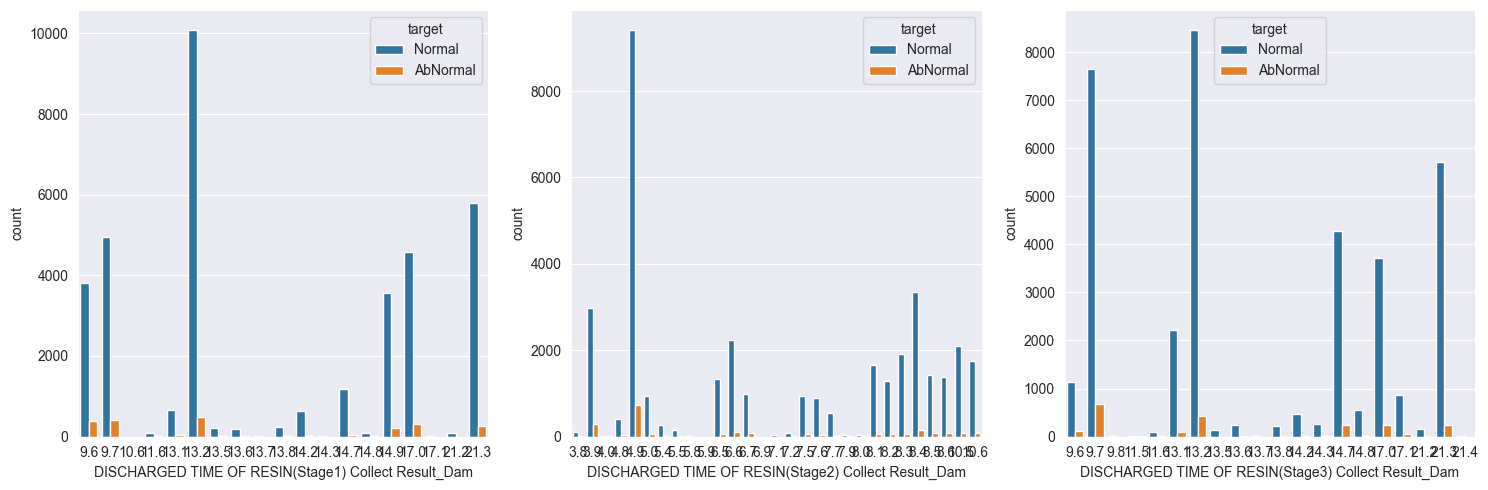

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

In [63]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Dam"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["DISCHARGED TIME OF RESIN(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["DISCHARGED TIME OF RESIN(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"].values.reshape(-1,1))

# kb.bin_edges_

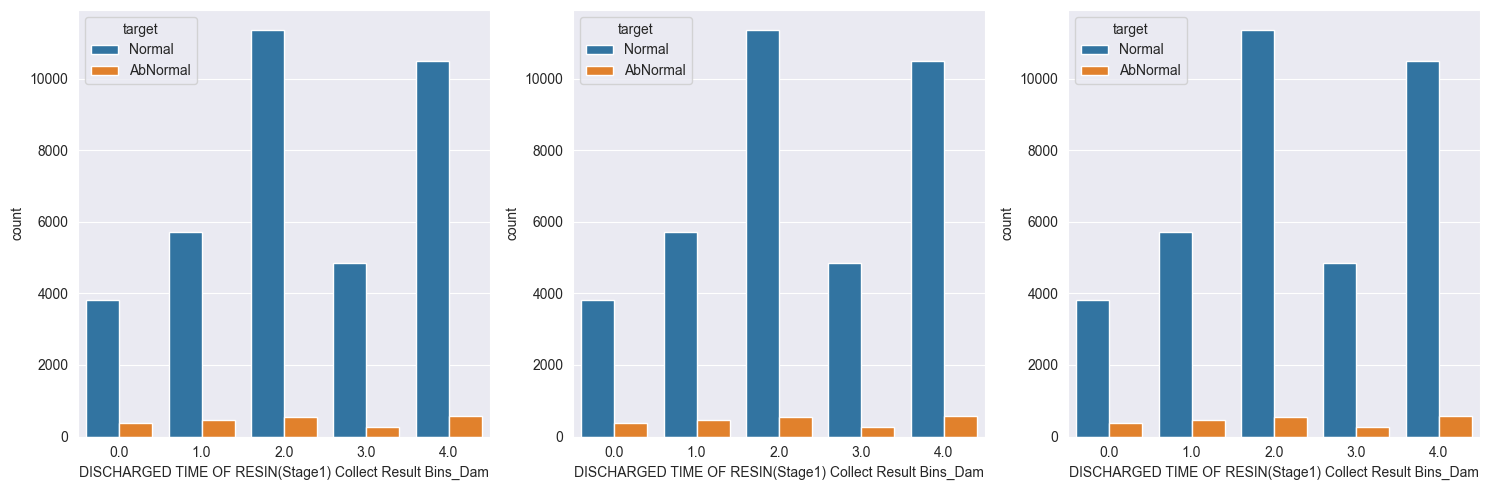

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

#### Dispense

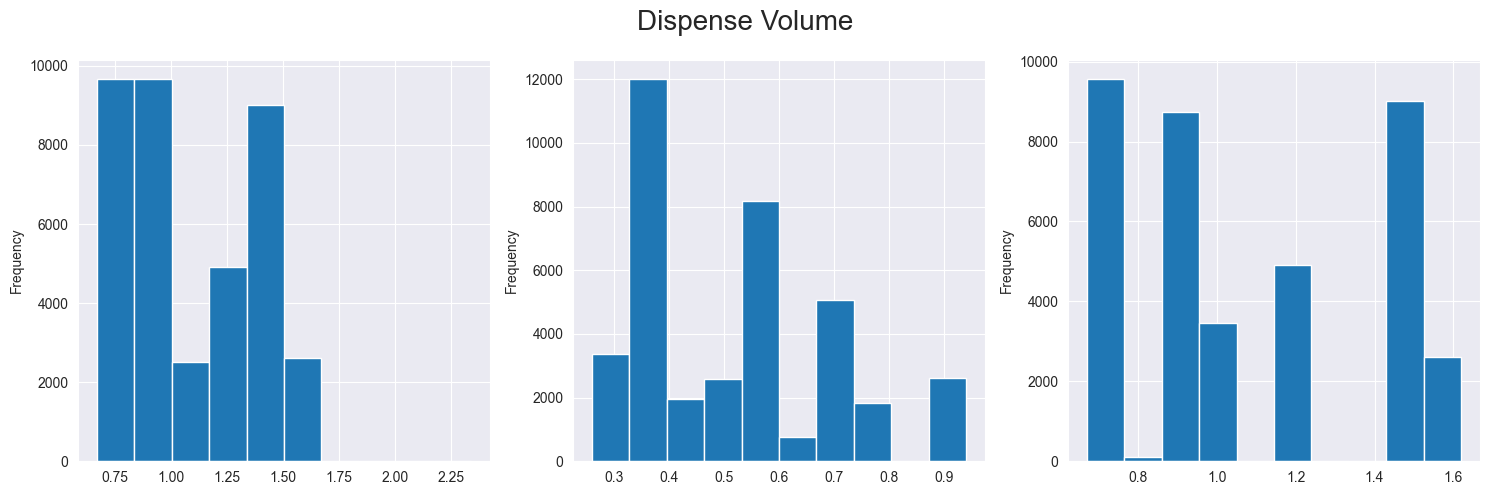

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df["Dispense Volume(Stage1) Collect Result_Dam"].plot.hist(ax=axes[0]);
df["Dispense Volume(Stage2) Collect Result_Dam"].plot.hist(ax=axes[1]);
df["Dispense Volume(Stage3) Collect Result_Dam"].plot.hist(ax=axes[2]);
plt.suptitle("Dispense Volume", size=20)
plt.tight_layout();

In [66]:
df["Dispense Volume(Stage1) Collect Result_Dam"].value_counts()

0.67    9573
0.92    7911
1.49    6046
1.19    4901
1.45    2659
1.04    1996
1.63    1787
1.61     752
0.99     615
0.91     482
1.02     471
0.96     245
1.44     217
0.94     208
0.95     197
0.81     103
1.48      92
1.03      49
1.62      45
1.56      37
1.00      17
2.34       4
0.74       1
Name: Dispense Volume(Stage1) Collect Result_Dam, dtype: int64

In [67]:
dispense_df = df.loc[:, df.columns.str.contains(r"^Dispense.*_Dam$")]
dispense_df.corr()
# 각 열들 상관관계 높음

,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam,1.000000,0.763367,0.999363
Dispense Volume(Stage2) Collect Result_Dam,0.763367,1.000000,0.759647
Dispense Volume(Stage3) Collect Result_Dam,0.999363,0.759647,1.000000


In [68]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Dispense Volume(Stage1) Collect Result Bins_Dam"] = kb.fit_transform(df["Dispense Volume(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["Dispense Volume(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["Dispense Volume(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["Dispense Volume(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["Dispense Volume(Stage3) Collect Result_Dam"].values.reshape(-1,1))

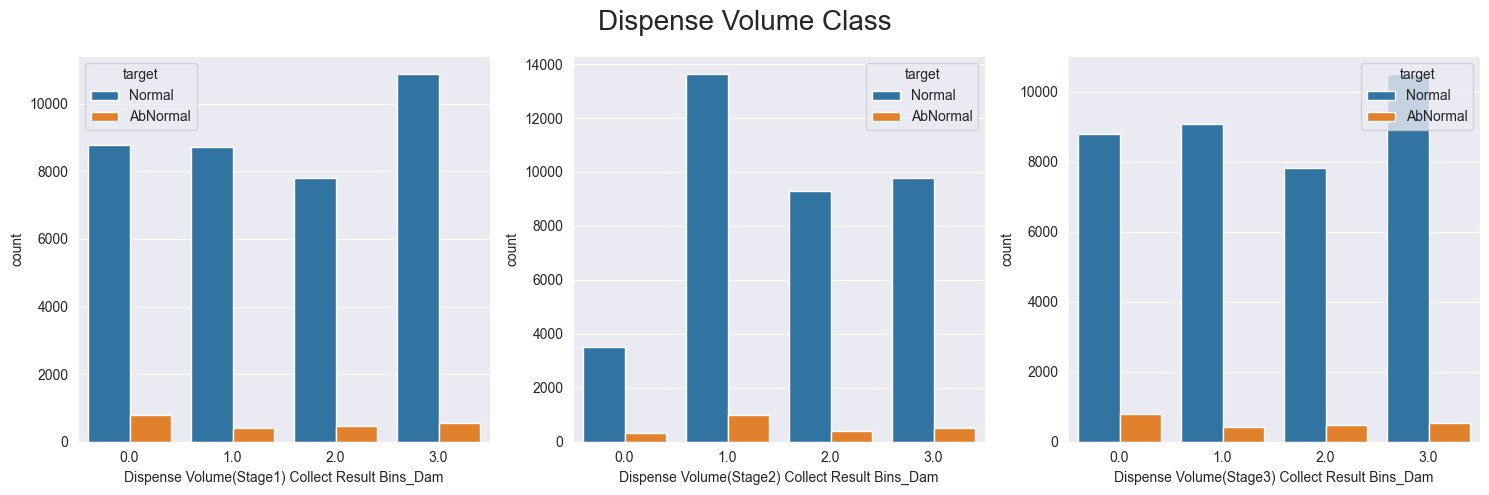

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="Dispense Volume(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Dispense Volume(Stage2) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Dispense Volume(Stage3) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2]);
plt.suptitle("Dispense Volume Class", size=20)
plt.tight_layout();

#### HEAD NORMAL

In [70]:
df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam"].value_counts()

377.5     8233
377.3     4303
552.0     4025
161.3     2411
553.6     2090
1269.0    1779
162.3     1637
160.8     1612
162.6     1432
551.7     1400
161.5     1233
553.4     1058
1271.3    1056
159.8      843
550.5      825
161.4      746
1271.8     745
553.1      547
551.0      489
160.3      446
162.9      396
552.9      243
161.2      232
553.2      183
162.2      126
162.1      102
552.3       67
552.6       46
553.0       38
552.4       38
162.5       20
552.7        3
553.7        1
554.0        1
161.9        1
552.2        1
Name: HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam, dtype: int64

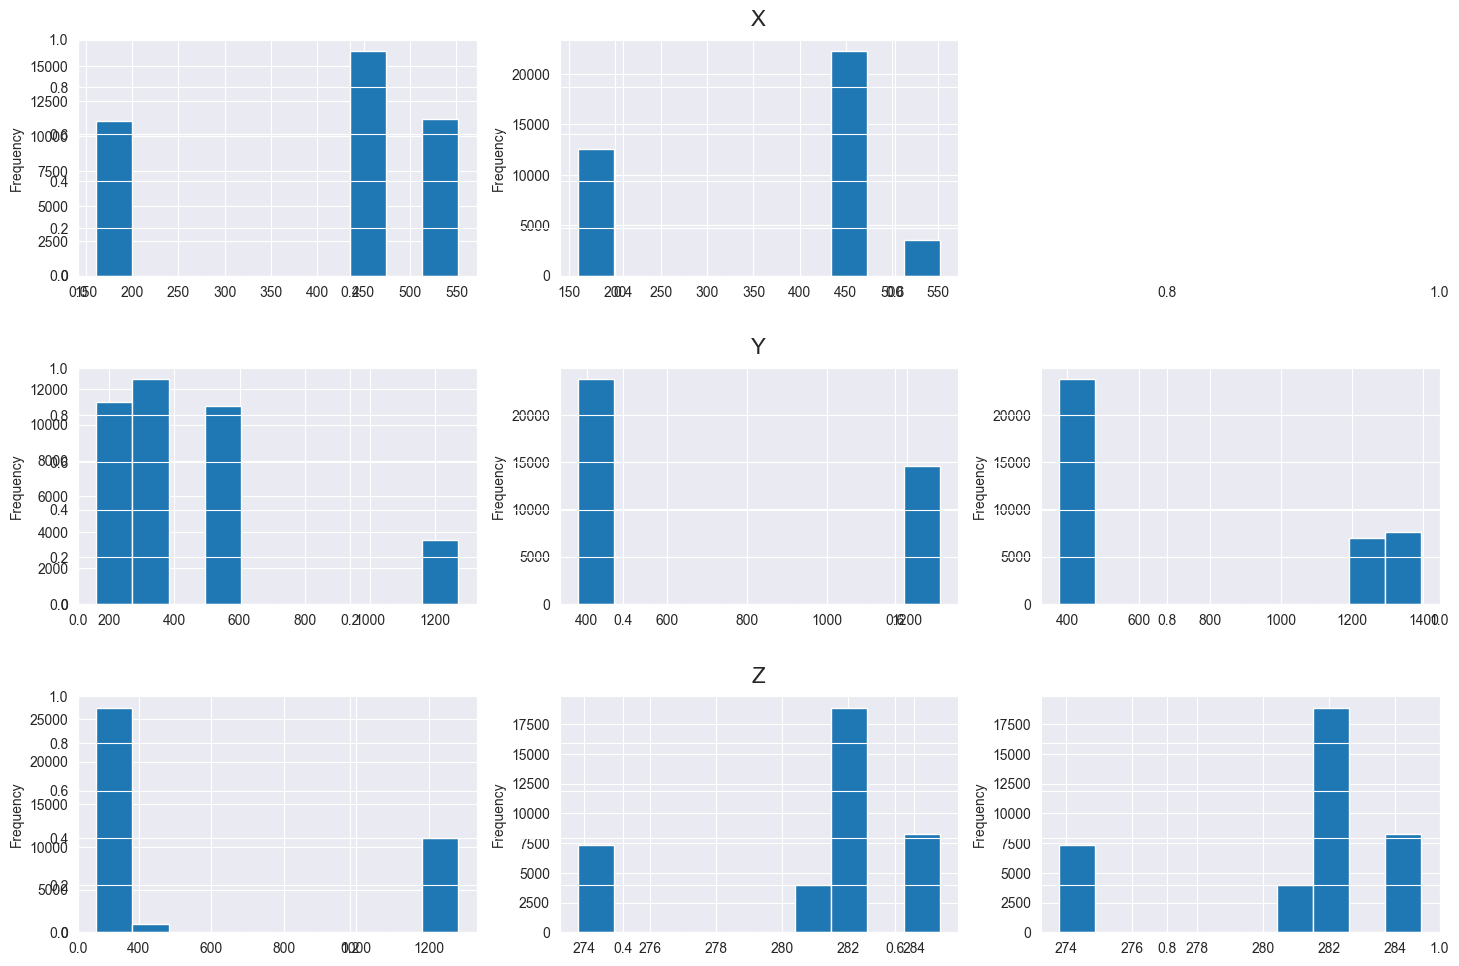

In [71]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))


df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam"].plot.hist(ax=axes[0, 0]);
df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam"].plot.hist(ax=axes[0, 1]);
axes[0, 2].remove()

df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam"].plot.hist(ax=axes[1, 0]);
df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam"].plot.hist(ax=axes[1, 1]);
df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam"].plot.hist(ax=axes[1, 2]);

df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam"].plot.hist(ax=axes[2, 0]);
df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam"].plot.hist(ax=axes[2, 1]);
df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam"].plot.hist(ax=axes[2, 2]);

fig.add_subplot(311, frame_on=False)
plt.title("X", fontsize=16, pad=10)

fig.add_subplot(312, frame_on=False)
plt.title("Y", fontsize=16, pad=10)

fig.add_subplot(313, frame_on=False)
plt.title("Z", fontsize=16, pad=10)

plt.tight_layout();

In [72]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam"].values.reshape(-1,1))


df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam"].values.reshape(-1,1))

df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam"].values.reshape(-1,1))

c:\Users\cathy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


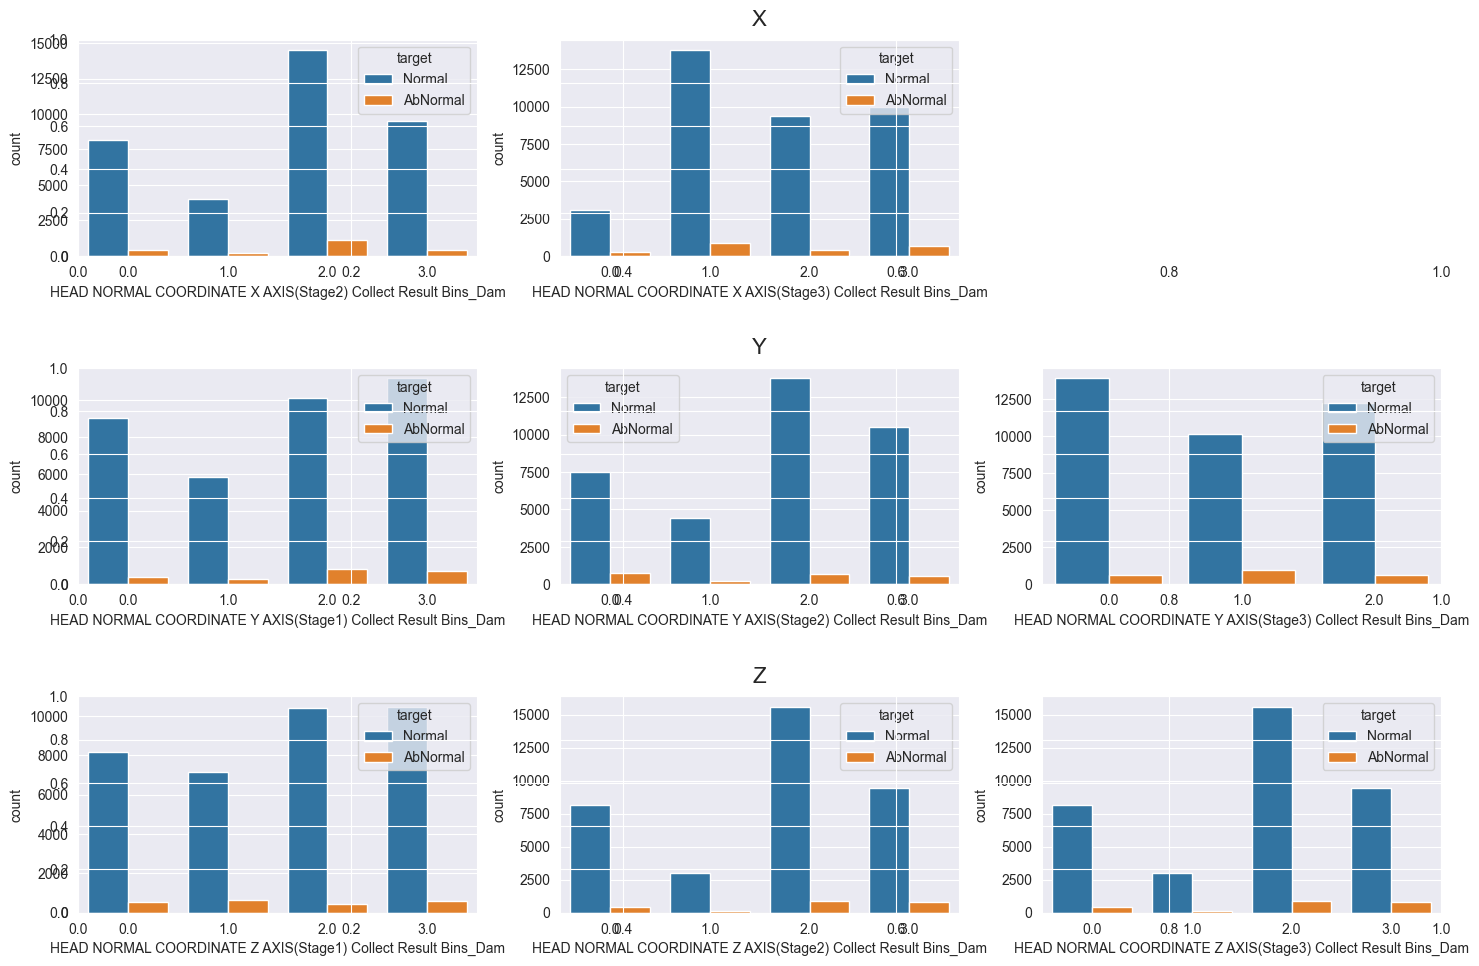

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

sns.countplot(x="HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result Bins_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result Bins_Dam", hue="target", data=df, ax=axes[0, 1]);
axes[0, 2].remove()

sns.countplot(x="HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1, 1]);
sns.countplot(x="HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1, 2]);

sns.countplot(x="HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2,0]);
sns.countplot(x="HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2,1]);
sns.countplot(x="HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2,2]);

fig.add_subplot(311, frame_on=False)
plt.title("X", fontsize=16, pad=10)

fig.add_subplot(312, frame_on=False)
plt.title("Y", fontsize=16, pad=10)

fig.add_subplot(313, frame_on=False)
plt.title("Z", fontsize=16, pad=10)

plt.tight_layout();

#### HEAD Standby

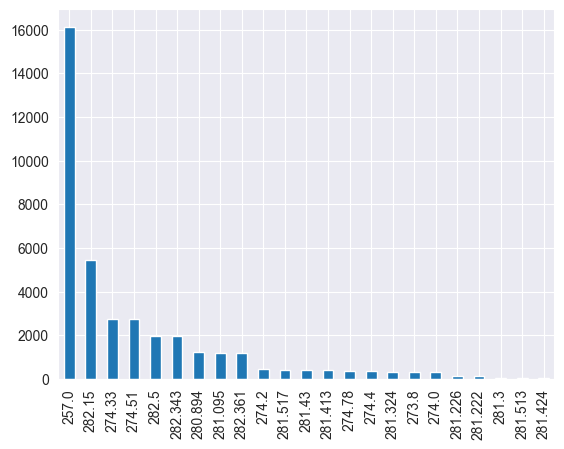

In [74]:
df["HEAD Standby Position X Collect Result_Dam"].value_counts().plot.bar();

<AxesSubplot:ylabel='Frequency'>

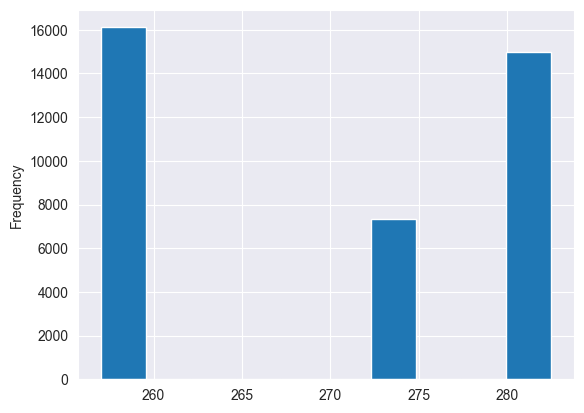

In [75]:
df["HEAD Standby Position X Collect Result_Dam"].plot.hist()

In [76]:
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans', random_state=RANDOM_SEED)
# 여기서는 Kmeans 사용함

df["HEAD Standby Position X Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD Standby Position X Collect Result_Dam"].values.reshape(-1,1))

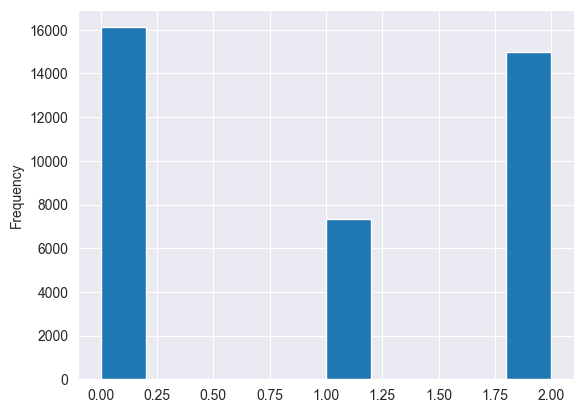

In [77]:
df["HEAD Standby Position X Collect Result Bins_Dam"].plot.hist();

In [78]:
df[["HEAD Standby Position Y Collect Result_Dam", "target"]].value_counts()

HEAD Standby Position Y Collect Result_Dam  target  
257                                         Normal      21249
66                                          Normal      14949
                                            AbNormal     1167
257                                         AbNormal     1043
dtype: int64

In [79]:
df[["HEAD Standby Position Z Collect Result_Dam", "target"]].value_counts()

HEAD Standby Position Z Collect Result_Dam  target  
66                                          Normal      21249
0                                           Normal      14949
                                            AbNormal     1167
66                                          AbNormal     1043
dtype: int64

In [80]:
df[["HEAD Standby Position Y Collect Result_Dam", "HEAD Standby Position Z Collect Result_Dam"]].corr()

,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam
HEAD Standby Position Y Collect Result_Dam,1.0,1.0
HEAD Standby Position Z Collect Result_Dam,1.0,1.0


#### HEAD Clean

In [81]:
df["Head Clean Position X Collect Result_Dam"].value_counts()

0.0      22292
127.5    16116
Name: Head Clean Position X Collect Result_Dam, dtype: int64

In [82]:
df["Head Clean Position Y Collect Result_Dam"].value_counts()

127.5    22292
66.0     16116
Name: Head Clean Position Y Collect Result_Dam, dtype: int64

In [83]:
df["Head Clean Position Z Collect Result_Dam"].value_counts()

66.00     22292
133.50     7907
130.85     7881
124.50      328
Name: Head Clean Position Z Collect Result_Dam, dtype: int64

In [84]:
filtered_df = df[
    (df["Head Clean Position X Collect Result_Dam"] == 0.0) &
    (df["Head Clean Position Y Collect Result_Dam"] == 127.5) &
    (df["Head Clean Position Z Collect Result_Dam"] == 66.0)
]
len(filtered_df)

22292

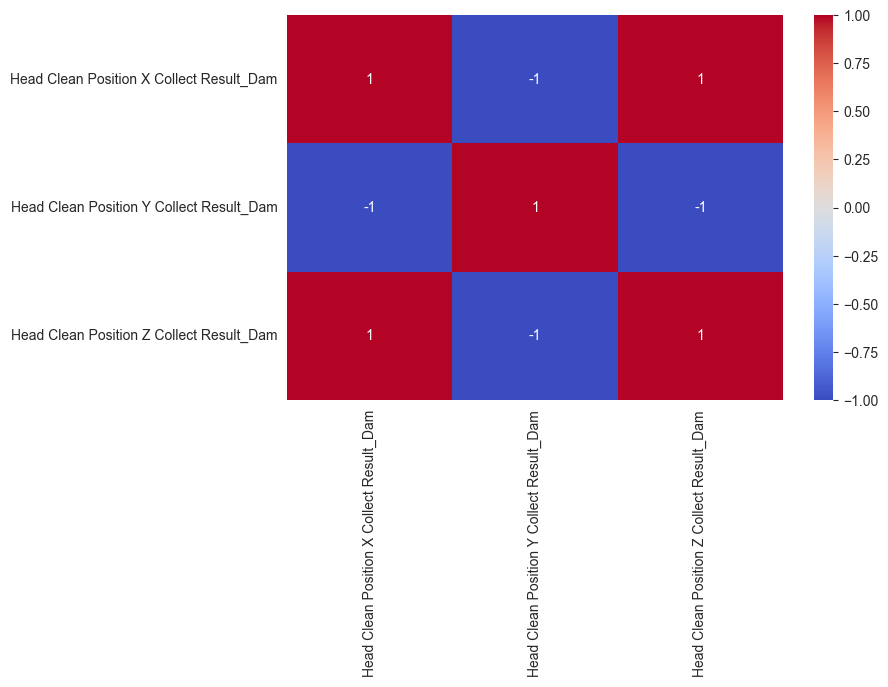

In [85]:
head_clean_df = df.loc[:, df.columns.str.contains(r"^Head Clean.*_Dam$")]

plt.figure(figsize=(8, 5))
sns.heatmap(head_clean_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

In [86]:
head_clean_df.corr()

,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam
Head Clean Position X Collect Result_Dam,1.000000,-1.000000,0.999428
Head Clean Position Y Collect Result_Dam,-1.000000,1.000000,-0.999428
Head Clean Position Z Collect Result_Dam,0.999428,-0.999428,1.000000


In [87]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA


# scaler = StandardScaler()
# scaled = scaler.fit_transform(head_clean_df)

# # PCA 적용
# pca = PCA(n_components=1)
# pca_comp = pca.fit_transform(scaled)
# # df["Head Clean Position Collect Result PCA_Dam"] = pca_comp

#### Head Purge

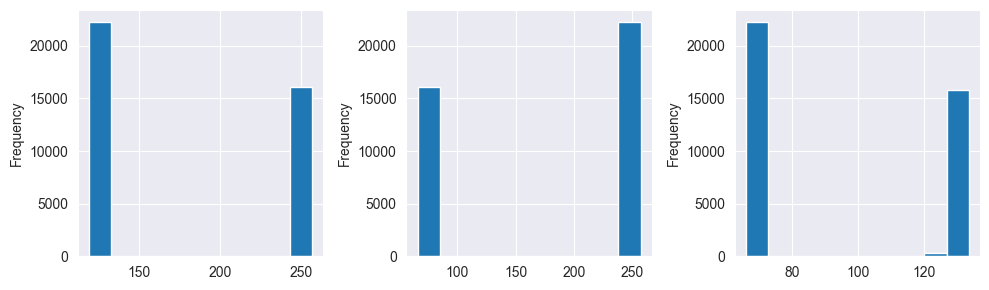

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

df["Head Purge Position X Collect Result_Dam"].plot.hist(ax=axes[0]);
df["Head Purge Position Y Collect Result_Dam"].plot.hist(ax=axes[1]);
df["Head Purge Position Z Collect Result_Dam"].plot.hist(ax=axes[2]);

plt.tight_layout();

In [89]:
df[["Head Purge Position X Collect Result_Dam", "target"]].value_counts()

Head Purge Position X Collect Result_Dam  target  
257.00                                    Normal      14949
130.85                                    Normal      14272
124.00                                    Normal       6944
257.00                                    AbNormal     1167
130.85                                    AbNormal      699
124.00                                    AbNormal      344
118.85                                    Normal         33
dtype: int64

In [90]:
df[["Head Purge Position Y Collect Result_Dam", "target"]].value_counts()

Head Purge Position Y Collect Result_Dam  target  
257                                       Normal      21249
66                                        Normal      14949
                                          AbNormal     1167
257                                       AbNormal     1043
dtype: int64

In [91]:
df[["Head Purge Position Z Collect Result_Dam", "target"]].value_counts()

Head Purge Position Z Collect Result_Dam  target  
66.00                                     Normal      21249
130.85                                    Normal       7424
133.50                                    Normal       7224
66.00                                     AbNormal     1043
133.50                                    AbNormal      698
130.85                                    AbNormal      442
124.50                                    Normal        301
                                          AbNormal       27
dtype: int64

#### Head Zero

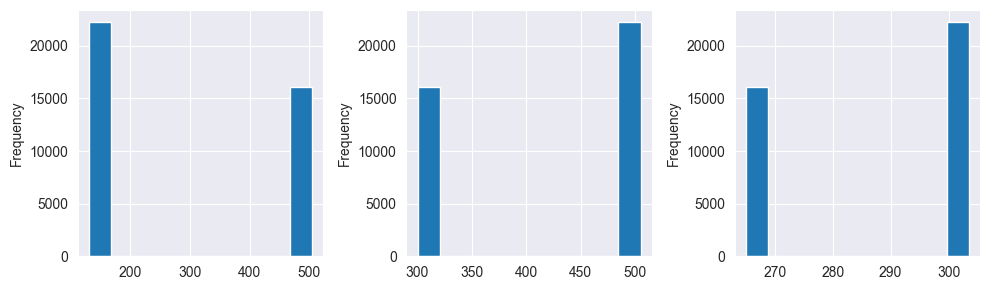

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

df["Head Zero Position X Collect Result_Dam"].plot.hist(ax=axes[0]);
df["Head Zero Position Y Collect Result_Dam"].plot.hist(ax=axes[1]);
df["Head Zero Position Z Collect Result_Dam"].plot.hist(ax=axes[2]);

plt.tight_layout();

In [93]:
df[["Head Zero Position Y Collect Result_Dam", "Head Zero Position Z Collect Result_Dam", "Head Purge Position Y Collect Result_Dam"]].corr()

,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Head Purge Position Y Collect Result_Dam
Head Zero Position Y Collect Result_Dam,1.000000,0.999915,0.999949
Head Zero Position Z Collect Result_Dam,0.999915,1.000000,0.999966
Head Purge Position Y Collect Result_Dam,0.999949,0.999966,1.000000


In [94]:
df[["Head Zero Position X Collect Result_Dam", "target"]].value_counts()

Head Zero Position X Collect Result_Dam  target  
130.85                                   Normal      21249
505.00                                   Normal      14949
                                         AbNormal     1167
130.85                                   AbNormal     1043
dtype: int64

In [95]:
df[["Head Zero Position Y Collect Result_Dam", "target"]].value_counts()

Head Zero Position Y Collect Result_Dam  target  
505.0                                    Normal      21249
300.0                                    Normal      10927
303.5                                    Normal       4022
505.0                                    AbNormal     1043
300.0                                    AbNormal      757
303.5                                    AbNormal      410
dtype: int64

In [96]:
df[["Head Zero Position Z Collect Result_Dam", "target"]].value_counts()

Head Zero Position Z Collect Result_Dam  target  
300.0                                    Normal      21228
265.0                                    Normal      14949
                                         AbNormal     1167
300.0                                    AbNormal     1000
303.5                                    AbNormal       43
                                         Normal         21
dtype: int64

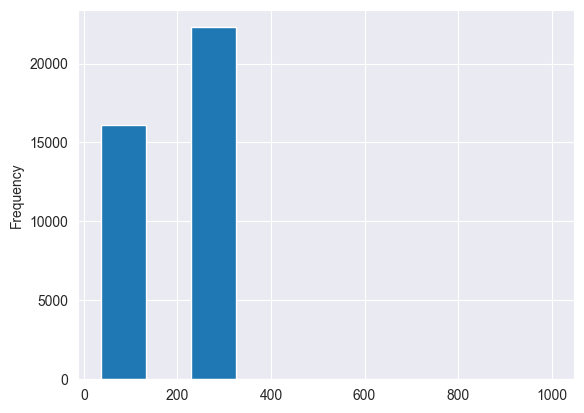

In [97]:
df["Machine Tact time Collect Result_Dam"].plot.hist();

In [98]:
df["Machine Tact time Collect Result_Dam"].describe()

count    38408.000000
mean       186.217442
std         93.415085
min         35.500000
25%         88.400000
50%        265.000000
75%        265.020000
max        999.900000
Name: Machine Tact time Collect Result_Dam, dtype: float64

In [99]:
df["Machine Tact time Collect Result_Dam"].value_counts()

265.02    13941
265.00     8351
92.20      1522
88.30      1284
88.40      1239
          ...  
54.10         1
84.10         1
92.50         1
78.60         1
99.60         1
Name: Machine Tact time Collect Result_Dam, Length: 262, dtype: int64

In [100]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Machine Tact time Collect Result Bins_Dam"] = kb.fit_transform(df["Machine Tact time Collect Result_Dam"].values.reshape(-1,1))

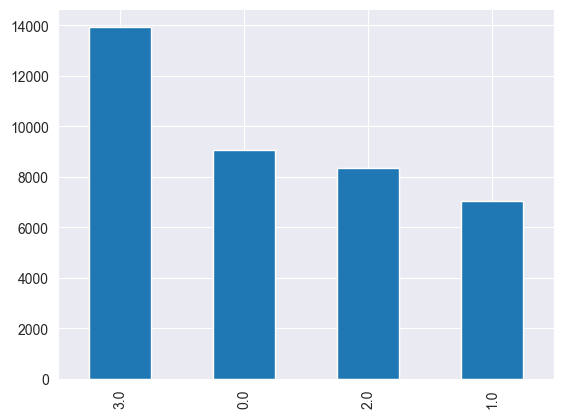

In [101]:
df["Machine Tact time Collect Result Bins_Dam"].value_counts().plot.bar();

In [102]:
kb.bin_edges_

array([array([ 35.5 ,  88.4 , 265.  , 265.02, 999.9 ])], dtype=object)

In [103]:
df["PalletID Collect Result_Dam"].value_counts()

4.0      1610
2.0      1584
1.0      1583
3.0      1582
7.0      1554
         ... 
69.8        1
90.0        1
47.6        1
85.1        1
110.5       1
Name: PalletID Collect Result_Dam, Length: 368, dtype: int64

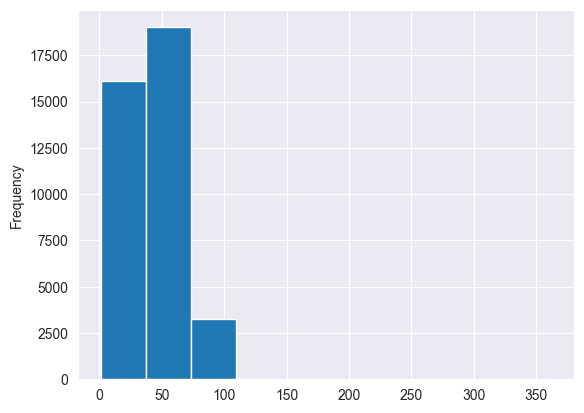

In [104]:
df["PalletID Collect Result_Dam"].plot.hist();

In [105]:
df["PalletID Collect Result_Dam"].describe()

count    38408.000000
mean        39.682288
std         29.482668
min          1.000000
25%          7.000000
50%         54.300000
75%         67.600000
max        362.300000
Name: PalletID Collect Result_Dam, dtype: float64

In [106]:
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["PalletID Collect Result Bins_Dam"] = kb.fit_transform(df["PalletID Collect Result_Dam"].values.reshape(-1,1))

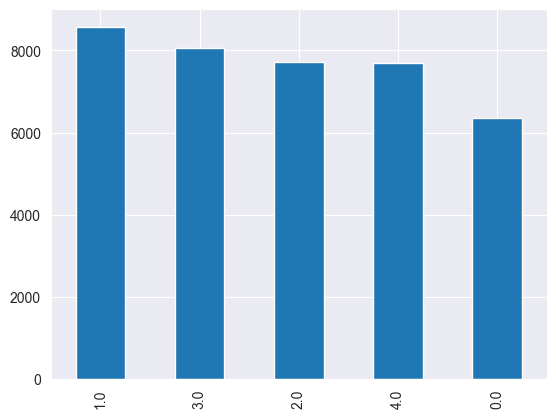

In [107]:
df["PalletID Collect Result Bins_Dam"].value_counts().plot.bar();

In [108]:
kb.bin_edges_

array([array([  1. ,   5. ,  14. ,  57. ,  71.2, 362.3])], dtype=object)

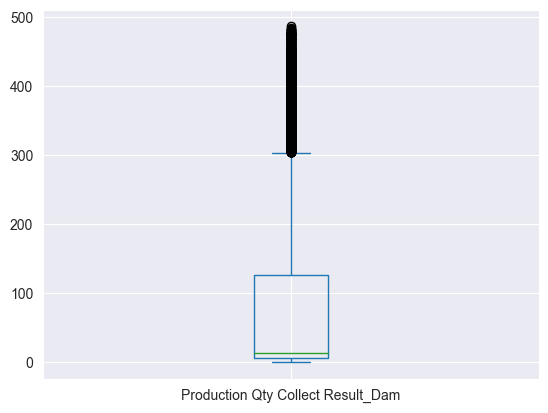

In [109]:
df["Production Qty Collect Result_Dam"].plot.box();

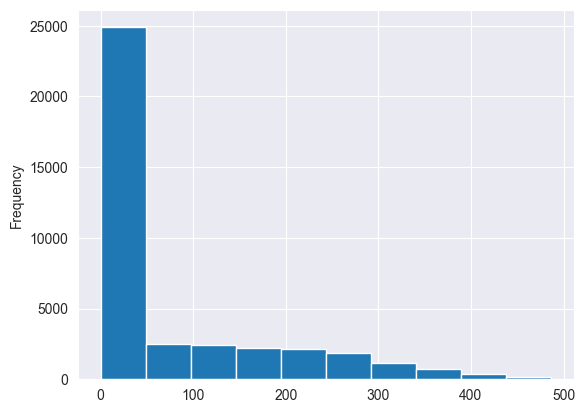

In [110]:
df["Production Qty Collect Result_Dam"].plot.hist();

In [111]:
df["Production Qty Collect Result_Dam"].value_counts()

16     1490
6      1488
3      1483
12     1478
14     1471
       ... 
482       1
483       1
460       1
485       1
472       1
Name: Production Qty Collect Result_Dam, Length: 486, dtype: int64

In [112]:
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Production Qty Collect Result Bins_Dam"] = kb.fit_transform(df["Production Qty Collect Result_Dam"].values.reshape(-1,1))

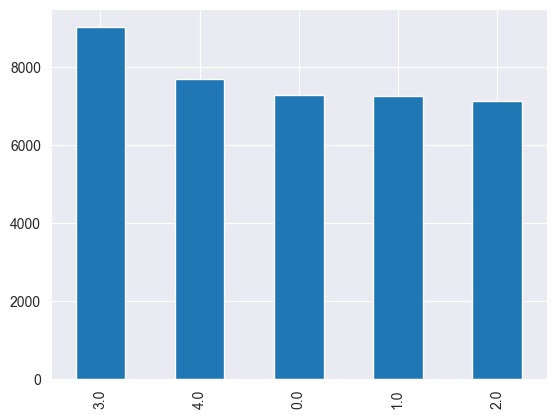

In [113]:
df["Production Qty Collect Result Bins_Dam"].value_counts().plot.bar();

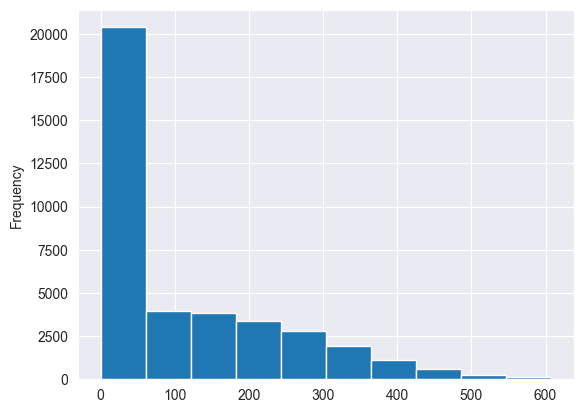

In [114]:
df["Receip No Collect Result_Dam"].plot.hist();

In [115]:
df["Receip No Collect Result_Dam"].describe()

count    38408.000000
mean       107.578994
std        131.875977
min          0.000000
25%          1.000000
50%         43.000000
75%        194.000000
max        608.000000
Name: Receip No Collect Result_Dam, dtype: float64

In [116]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans', random_state=RANDOM_SEED)

df["Receip No Collect Result Bins_Dam"] = kb.fit_transform(df["Receip No Collect Result_Dam"].values.reshape(-1,1))

In [117]:
df[["Receip No Collect Result Bins_Dam", "target"]].value_counts()

Receip No Collect Result Bins_Dam  target  
0.0                                Normal      19701
1.0                                Normal       7651
2.0                                Normal       6249
3.0                                Normal       2597
0.0                                AbNormal     1471
1.0                                AbNormal      357
2.0                                AbNormal      264
3.0                                AbNormal      118
dtype: int64

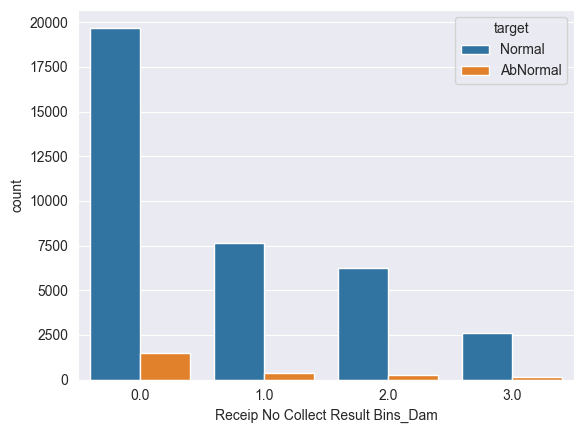

In [118]:
sns.countplot(x="Receip No Collect Result Bins_Dam", hue="target", data=df);

#### Stage1 ~ 3 Circle1~4

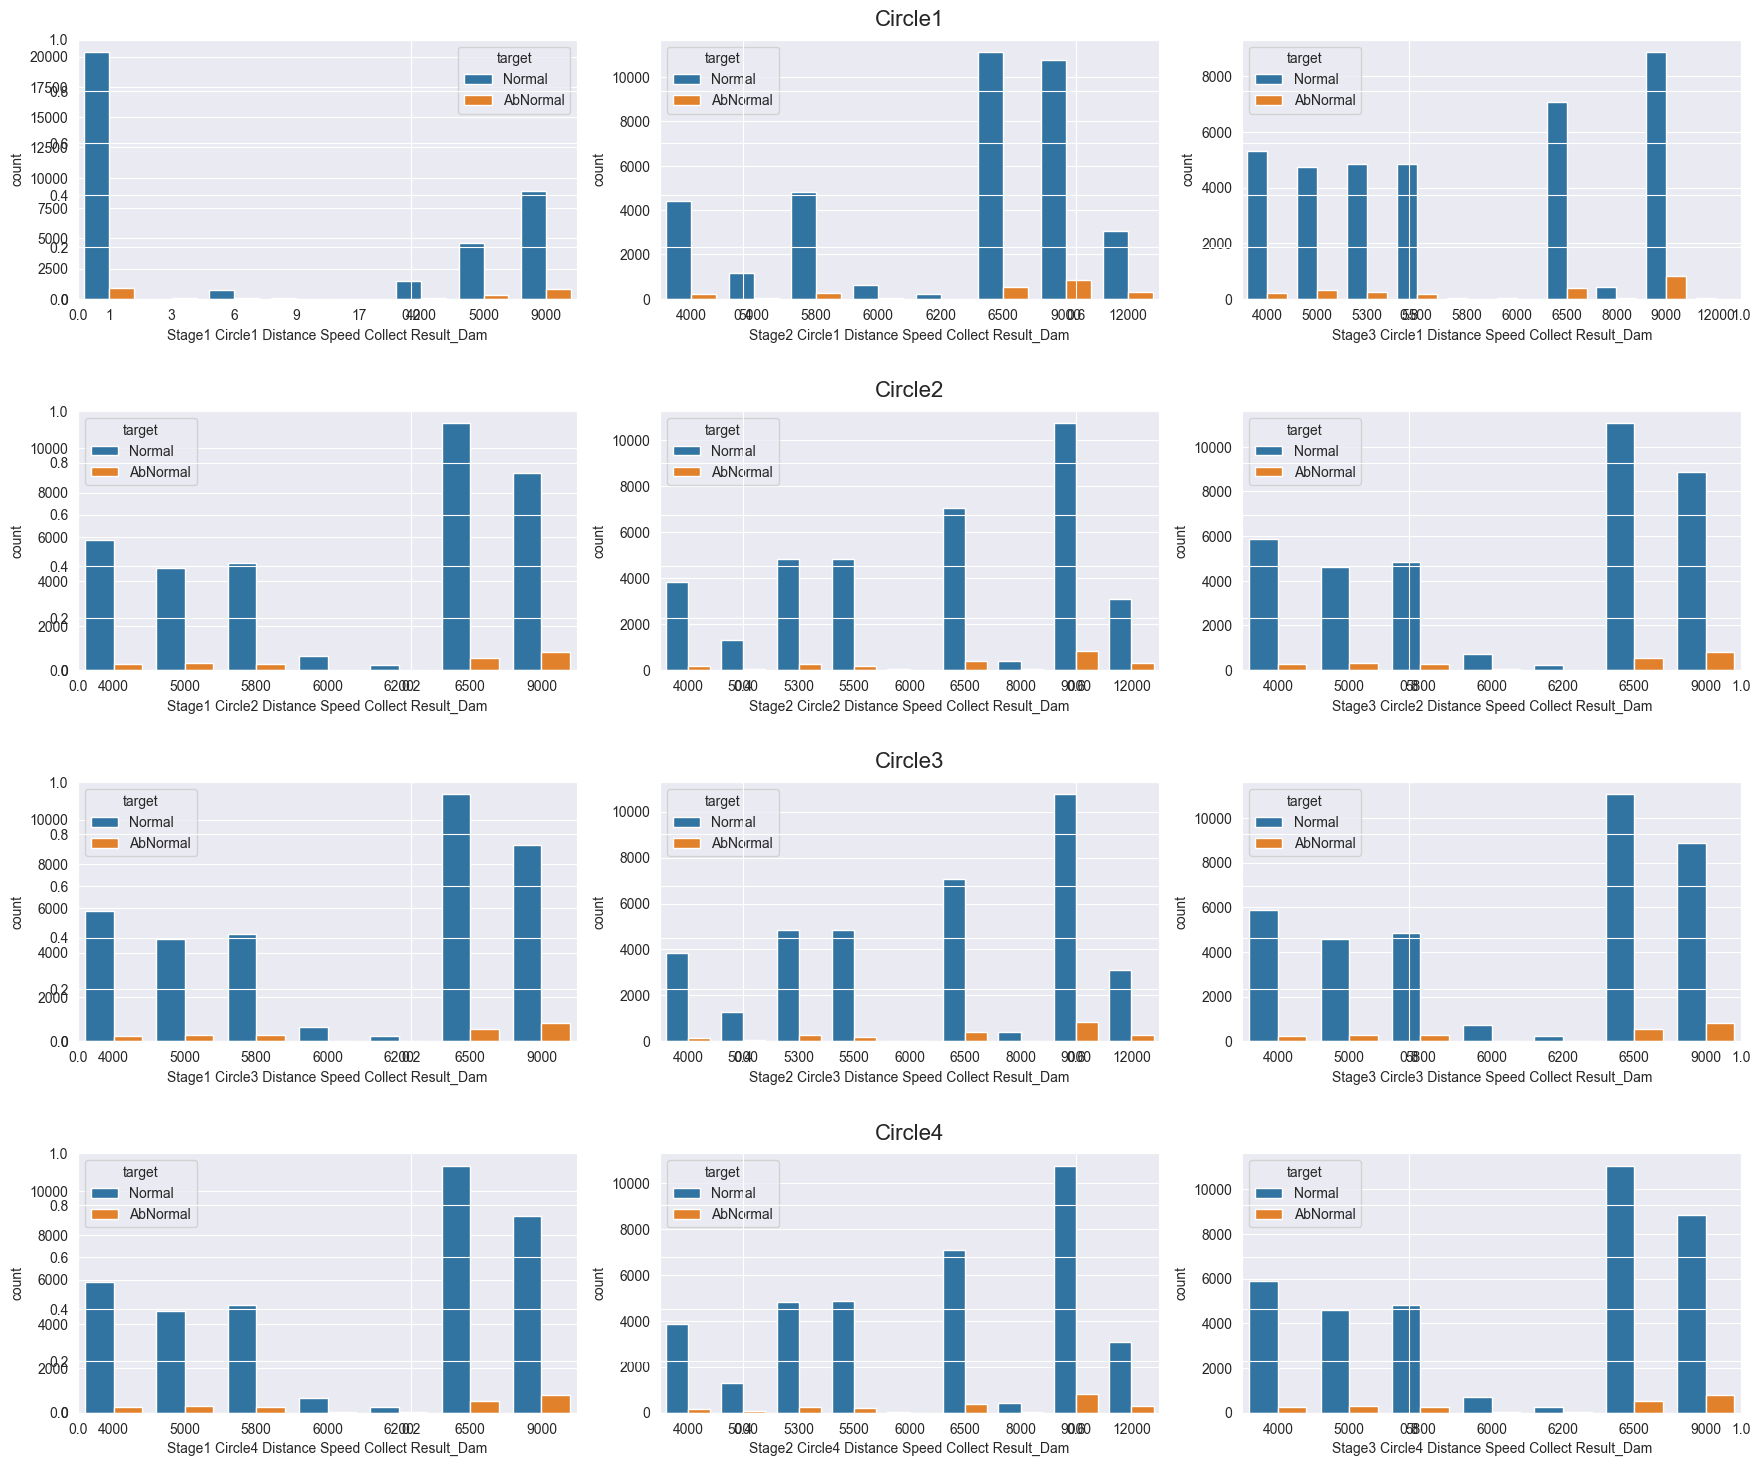

In [123]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))

sns.countplot(x="Stage1 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage2 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage3 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 2]);

sns.countplot(x="Stage1 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage2 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 1]);
sns.countplot(x="Stage3 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 2]);

sns.countplot(x="Stage1 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 0]);
sns.countplot(x="Stage2 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 1]);
sns.countplot(x="Stage3 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 2]);

sns.countplot(x="Stage1 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 0]);
sns.countplot(x="Stage2 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 1]);
sns.countplot(x="Stage3 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 2]);

fig.add_subplot(411, frame_on=False)
plt.title("Circle1", fontsize=16, pad=10)

fig.add_subplot(412, frame_on=False)
plt.title("Circle2", fontsize=16, pad=10)

fig.add_subplot(413, frame_on=False)
plt.title("Circle3", fontsize=16, pad=10)

fig.add_subplot(414, frame_on=False)
plt.title("Circle4", fontsize=16, pad=10)


plt.tight_layout();

In [ ]:
circle2_dam_df = df[["Stage1 Circle2 Distance Speed Collect Result_Dam",
                     "Stage2 Circle2 Distance Speed Collect Result_Dam",
                     "Stage3 Circle2 Distance Speed Collect Result_Dam"]]

circle3_dam_df = df[["Stage1 Circle3 Distance Speed Collect Result_Dam",
                     "Stage2 Circle3 Distance Speed Collect Result_Dam",
                     "Stage3 Circle3 Distance Speed Collect Result_Dam"]]

circle4_dam_df = df[["Stage1 Circle4 Distance Speed Collect Result_Dam",
                     "Stage2 Circle4 Distance Speed Collect Result_Dam",
                     "Stage3 Circle4 Distance Speed Collect Result_Dam"]]

In [ ]:
circle2_dam_df.equals(circle3_dam_df)

In [ ]:
circle2_dam_df.equals(circle4_dam_df)

In [138]:
circle2_3_dam =  ["Stage1 Circle3 Distance Speed Collect Result_Dam",
             "Stage2 Circle3 Distance Speed Collect Result_Dam",
             "Stage3 Circle3 Distance Speed Collect Result_Dam",
             "Stage1 Circle4 Distance Speed Collect Result_Dam",
             "Stage2 Circle4 Distance Speed Collect Result_Dam",
             "Stage3 Circle4 Distance Speed Collect Result_Dam"]

df.drop(circle2_3_dam, axis=1, inplace=True)

In [140]:
utils.columns_to_txt(df, col_name="Dam")

#### Stage1 ~ 3 Line1~4

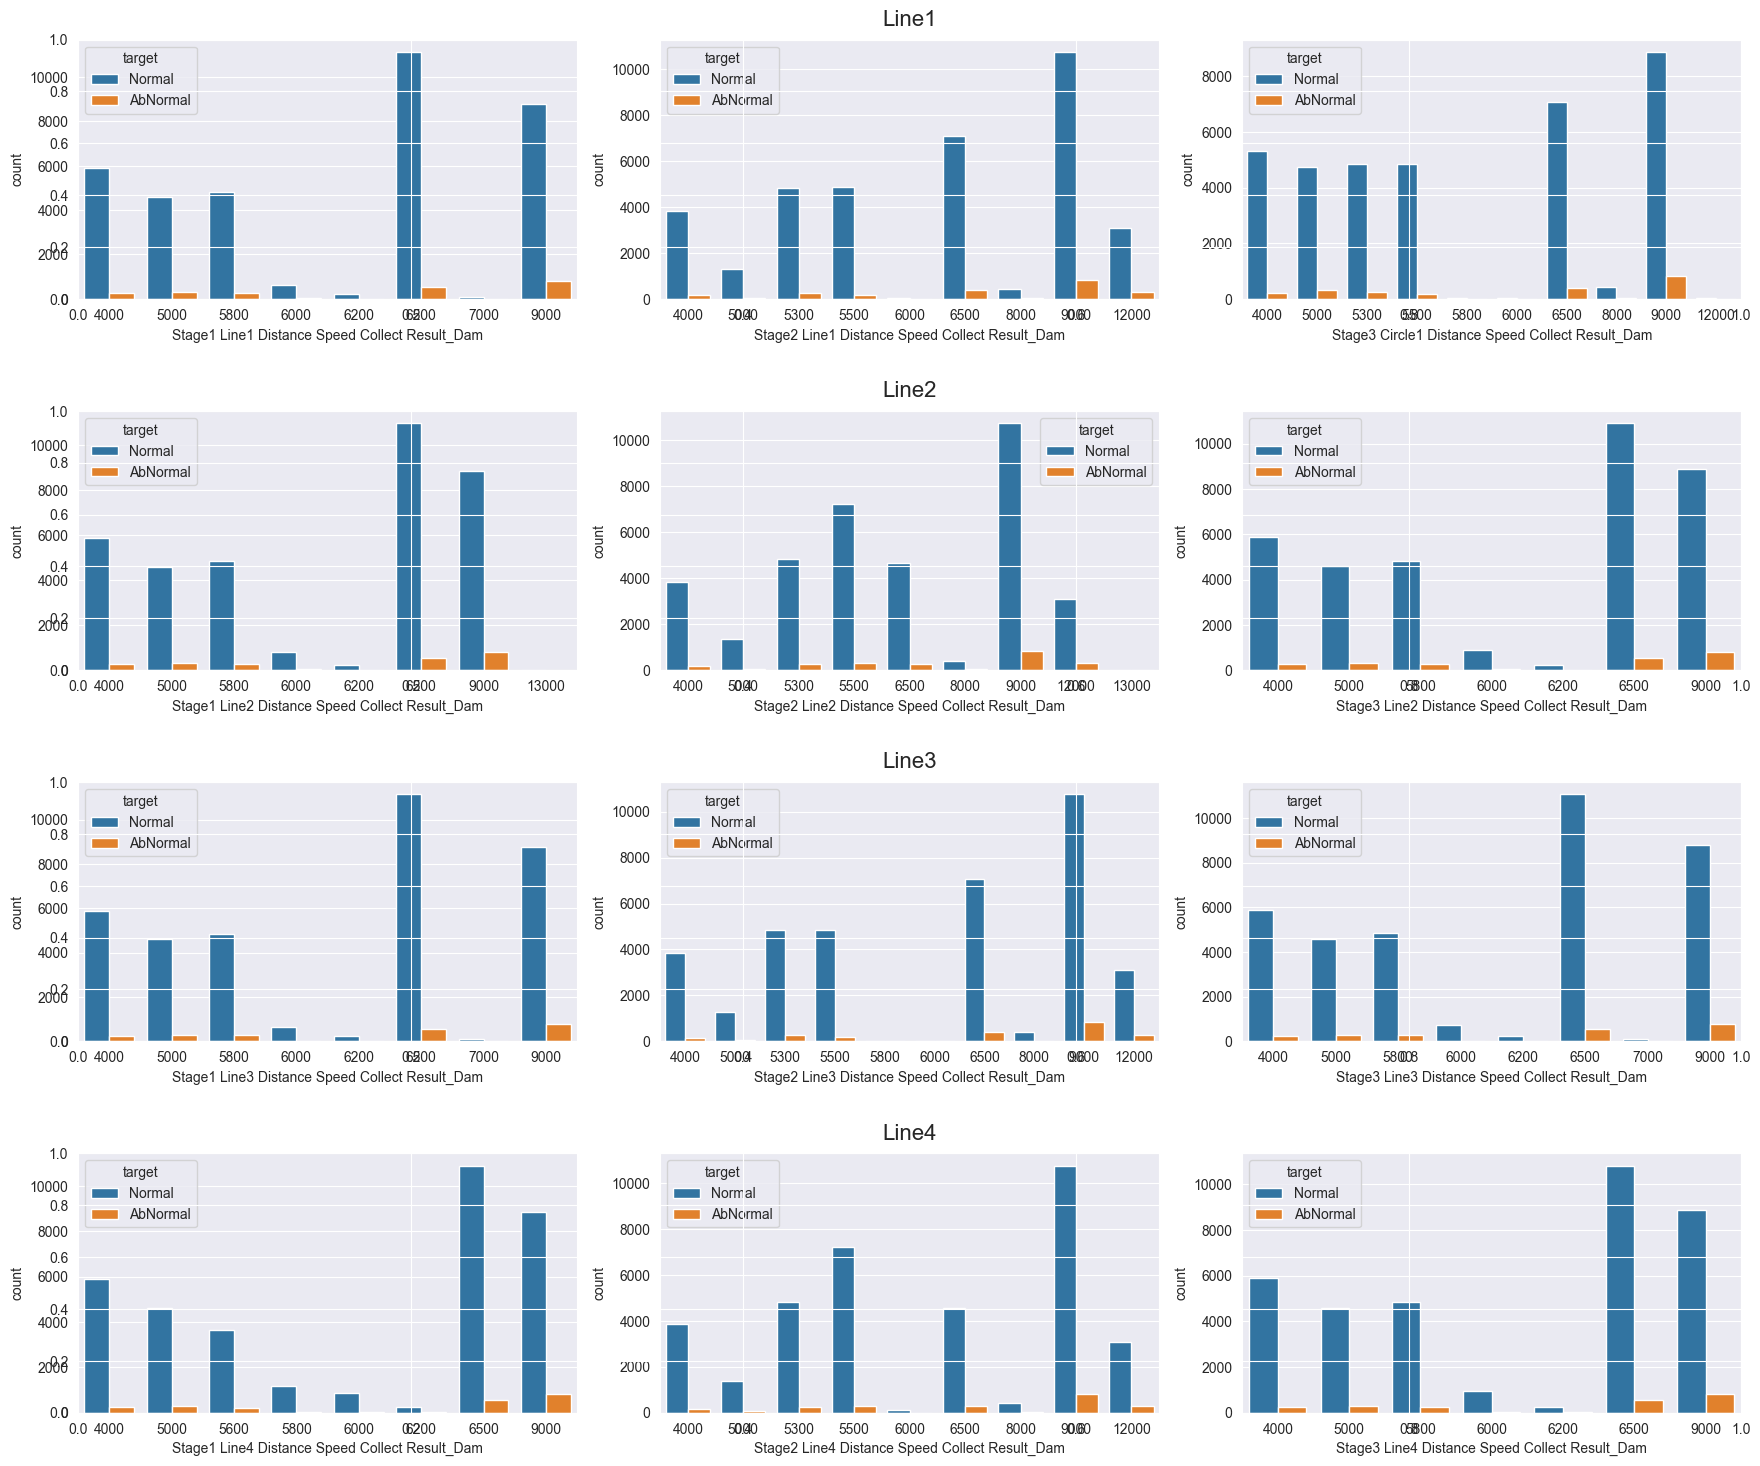

In [124]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))

sns.countplot(x="Stage1 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage2 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage3 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 2]);

sns.countplot(x="Stage1 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage2 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 1]);
sns.countplot(x="Stage3 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 2]);

sns.countplot(x="Stage1 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 0]);
sns.countplot(x="Stage2 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 1]);
sns.countplot(x="Stage3 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 2]);

sns.countplot(x="Stage1 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 0]);
sns.countplot(x="Stage2 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 1]);
sns.countplot(x="Stage3 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 2]);

fig.add_subplot(411, frame_on=False)
plt.title("Line1", fontsize=16, pad=10)

fig.add_subplot(412, frame_on=False)
plt.title("Line2", fontsize=16, pad=10)

fig.add_subplot(413, frame_on=False)
plt.title("Line3", fontsize=16, pad=10)

fig.add_subplot(414, frame_on=False)
plt.title("Line4", fontsize=16, pad=10)


plt.tight_layout();

In [ ]:
Q1 = df['3rd Pressure Collect Result_AutoClave'].quantile(0.25)
Q3 = df['3rd Pressure Collect Result_AutoClave'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}") # 2098개

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['3rd Pressure Collect Result_AutoClave'] >= lower_bound) & (df['3rd Pressure Collect Result_AutoClave'] <= upper_bound)]

In [166]:
# Stage별로 비슷해서 Stage끼리 묶음
stage1_line_dam = df[["Stage1 Line1 Distance Speed Collect Result_Dam",
                      "Stage1 Line2 Distance Speed Collect Result_Dam",
                      "Stage1 Line3 Distance Speed Collect Result_Dam",
                      "Stage1 Line4 Distance Speed Collect Result_Dam"]]

stage2_line_dam = df[["Stage2 Line1 Distance Speed Collect Result_Dam",
                      "Stage2 Line2 Distance Speed Collect Result_Dam",
                      "Stage2 Line3 Distance Speed Collect Result_Dam",
                      "Stage2 Line4 Distance Speed Collect Result_Dam"]]

stage3_line_dam = df[["Stage3 Line1 Distance Speed Collect Result_Dam",
                      "Stage3 Line2 Distance Speed Collect Result_Dam",
                      "Stage3 Line3 Distance Speed Collect Result_Dam",
                      "Stage3 Line4 Distance Speed Collect Result_Dam"]]


df["Mean Stage1 Line Distance Speed Collect Result_Dam"] = stage1_line_dam.apply("mean", axis=1).astype('int64')
df["Mean Stage2 Line Distance Speed Collect Result_Dam"] = stage2_line_dam.apply("mean", axis=1).astype('int64')
df["Mean Stage3 Line Distance Speed Collect Result_Dam"] = stage3_line_dam.apply("mean", axis=1).astype('int64')

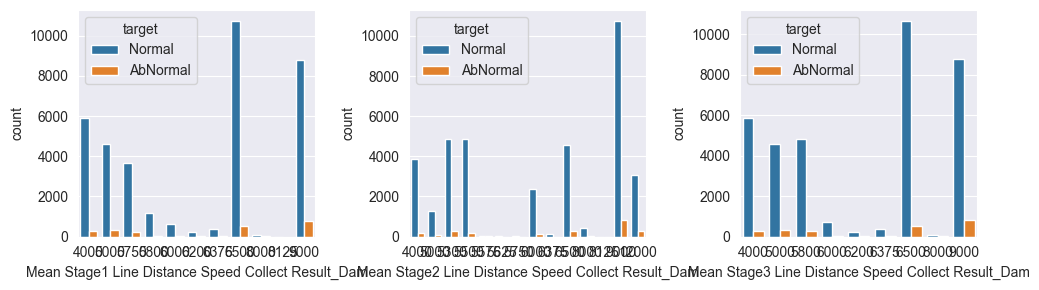

In [168]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.countplot(x="Mean Stage1 Line Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Mean Stage2 Line Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Mean Stage3 Line Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

#### THICKNESS

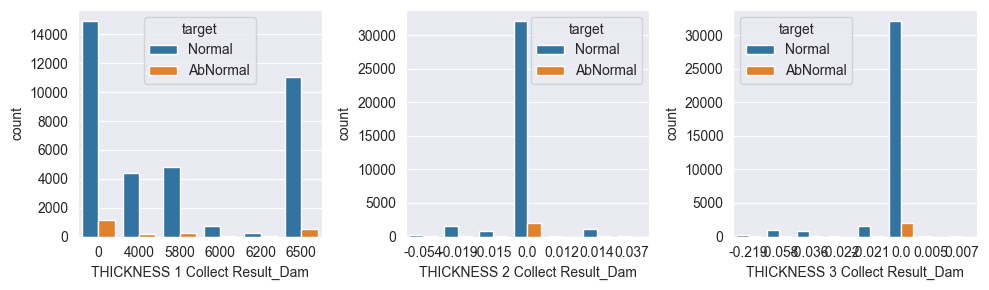

In [174]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.countplot(x="THICKNESS 1 Collect Result_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="THICKNESS 2 Collect Result_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="THICKNESS 3 Collect Result_Dam", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

<AxesSubplot:>

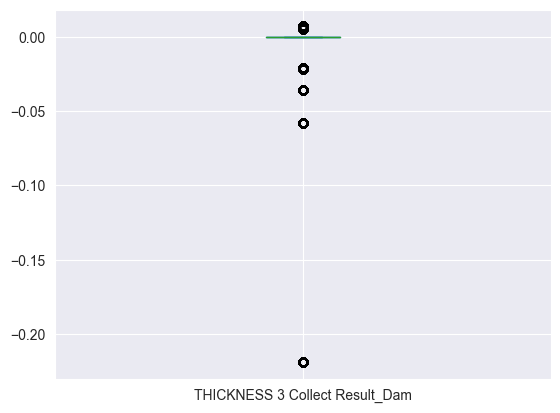

In [183]:
df["THICKNESS 3 Collect Result_Dam"].plot.box()

In [197]:
df["THICKNESS 3 Collect Result_Dam"].value_counts()

 0.000    34105
-0.021     1649
-0.058     1056
-0.036      962
-0.219      243
 0.007      150
-0.022      125
 0.005      118
Name: THICKNESS 3 Collect Result_Dam, dtype: int64

In [187]:
df["THICKNESS 3 Collect Result_Dam"].describe()

count    38408.000000
mean        -0.004812
std          0.020640
min         -0.219000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.007000
Name: THICKNESS 3 Collect Result_Dam, dtype: float64

In [194]:
z_score = abs((df["THICKNESS 2 Collect Result_Dam"]-df["THICKNESS 2 Collect Result_Dam"].mean())/df["THICKNESS 3 Collect Result_Dam"].std())
df[z_score > 1.96]["THICKNESS 2 Collect Result_Dam"].unique()

array([-0.054])

In [196]:
z_score = abs((df["THICKNESS 3 Collect Result_Dam"]-df["THICKNESS 3 Collect Result_Dam"].mean())/df["THICKNESS 3 Collect Result_Dam"].std())
df[z_score > 1.96]["THICKNESS 3 Collect Result_Dam"].unique()

array([-0.058, -0.219])

<AxesSubplot:>

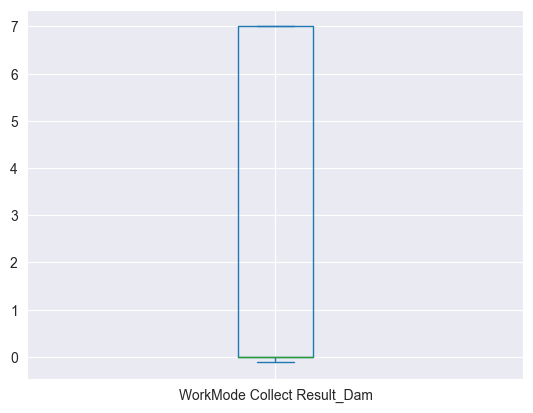

In [179]:
df["WorkMode Collect Result_Dam"].plot.box()

### Fill2

In [ ]:
check = ["HEAD Standby Position Y Collect Result_Fill2",
         "HEAD Standby Position Z Collect Result_Fill2",
         "Head Clean Position X Collect Result_Fill2",
         "Head Clean Position Y Collect Result_Fill2",
         "Head Clean Position Z Collect Result_Fill2",
         "Head Purge Position X Collect Result_Fill2",
         "Head Purge Position Y Collect Result_Fill2",
         "Head Purge Position Z Collect Result_Fill2"]

In [ ]:
tt = df[check]

In [ ]:
len(df[check])

In [ ]:
unique_rows = tt.drop_duplicates()

In [ ]:
unique_rows

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

df["HEAD Standby Position X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 0]);
df["HEAD Standby Position Y Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 1]);
df["HEAD Standby Position Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 2]);

df["Head Clean Position X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 0]);
df["Head Clean Position Y Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 1]);
df["Head Clean Position Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 2]);

df["Head Purge Position X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 0]);
df["Head Purge Position Y Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 1]);
df["Head Purge Position Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 2]);

for ax in axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=20)
 
plt.tight_layout();

In [ ]:
similar_dist_columns = [
    "Head Clean Position X Collect Result_Fill2",
    "Head Purge Position X Collect Result_Fill2"]

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix');

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

df["HEAD Standby Position X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 0]);
df["HEAD Standby Position Y Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 1]);
df["HEAD Standby Position Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 2]);

df["Head Clean Position X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 0]);
df["Head Clean Position Y Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 1]);
df["Head Clean Position Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 2]);

df["Head Purge Position X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 0]);
df["Head Purge Position Y Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 1]);
df["Head Purge Position Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 2]);

for ax in axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=20)
 
plt.tight_layout();

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix');

In [ ]:
df["HEAD Standby Position Y Collect Result_Fill2"].equals(df["Head Purge Position Y Collect Result_Fill2"])

In [ ]:
df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1"].plot.hist()

In [ ]:
df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2"].plot.hist()

In [ ]:
df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam"].plot.hist()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

df["CURE START POSITION X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 0]);
df["CURE START POSITION Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 1]);
df["CURE START POSITION Θ Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 2]);

df["CURE STANDBY POSITION X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 0]);
df["CURE STANDBY POSITION Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 1]);
df["CURE STANDBY POSITION Θ Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 2]);

df["CURE END POSITION X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 0]);
df["CURE END POSITION Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 1]);
df["CURE END POSITION Θ Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 2]);

for ax in axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=20)
 
plt.tight_layout();

In [ ]:
df["Stage1 Circle2 Distance Speed Collect Result_Dam"].value_counts()

In [ ]:
df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].describe()

In [ ]:
df['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam'].plot.hist()

In [ ]:
#

In [ ]:
df["CURE END POSITION X Collect Result_Dam"].value_counts().plot.bar()

In [ ]:
sns.countplot(x="CURE SPEED Collect Result_Dam", hue="target", data=df);

In [ ]:
df["Dispense Volume(Stage1) Collect Result_Dam"].plot.hist()

In [ ]:
df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].plot.hist()

In [ ]:
tmp = df[["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam", "DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam", "DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"]]

In [ ]:
tmp.values.tolist()

In [ ]:
tmp = df['CURE START POSITION X Collect Result_Dam'] - df['CURE END POSITION X Collect Result_Dam']
tmp = pd.DataFrame(tmp)

In [ ]:
tmp.value_counts()

In [ ]:
ttmp = tmp.apply(func="mean", axis=1)
ttmp = pd.DataFrame(ttmp)

In [ ]:
ttmp.plot.hist()

In [ ]:
df[["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam", "target"]].groupby("target").count()

In [ ]:
df["DISCHARGED SPEED OF RESIN Collect Result_Dam"].value_counts()

In [ ]:
df[["DISCHARGED SPEED OF RESIN Collect Result_Dam", "target"]].groupby("target").value_counts()
# 10은 0.066로 abnormal (1406/21046)
# 16은 0.048로 abnormal (943/19456)
# 15은 0.25로 abnormal (1/4) (전체가 4개밖에 없어서 비율이 높은 듯)

In [ ]:
df["CURE START POSITION Θ Collect Result_Dam"].equals(df["CURE END POSITION Θ Collect Result_Dam"])

In [ ]:
df["CURE SPEED Collect Result_Dam"].plot.hist();

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

In [ ]:
df["CURE SPEED Collect Result_Dam"].values.reshape(-1, 1)

In [ ]:
t = kbd.fit_transform(df["CURE SPEED Collect Result_Dam"].values.reshape(-1, 1))

In [ ]:
t

In [ ]:
kbd.bin_edges_

In [ ]:
df["CURE END POSITION X Collect Result_Dam"].plot.hist()